# **Final Project: Class Imbalance and class Overlap** 

***

## Introduction

* Financial fraud detection faces significant challenges due to inherent data characteristics. One major issue is class imbalance, where fraudulent transactions are vastly outnumbered by legitimate ones. This imbalance biases machine learning models towards the majority class, making it difficult to accurately identify fraud. Datasets used for training these models often exhibit this imbalance along with heavily skewed distributions, further complicating the problem. A simple model that classifies all transactions as legitimate can achieve high accuracy on such imbalanced data, despite failing to detect any actual fraud. This extreme class imbalance is a persistent obstacle, particularly in the context of mobile payment fraud.

* Another key challenge is class overlap. Fraudsters often attempt to disguise their activities by mimicking legitimate transactions, creating overlap between the two classes. This overlap makes it difficult to distinguish between genuine and fraudulent activities, especially within the massive datasets characteristic of financial transactions. Overlapping classes are a common issue in extremely class-imbalanced data, hindering the creation of effective rules and clear decision boundaries for classification. Detecting electronic fraud in transactions also poses the challenge of class imbalance with overlap.

* To address these challenges, various techniques have been proposed. Ensemble algorithms, such as random forests, combine the predictions of multiple models to improve overall accuracy. However, research in this area has sometimes focused too narrowly on specific algorithms, leaving other ensemble approaches underexplored. Furthermore, the effective integration of ensemble classifiers with data-level strategies remains an area requiring further investigation. This research seeks to conduct a comparative analysis of integrated strategies that combine data-level approaches with ensemble classifiers.

* Data-level approaches, including resampling techniques and synthetic data generation methods like SMOTE, aim to balance the class distribution. While these techniques can be helpful, they also introduce potential problems, such as distributional overlap and noise in the data. Resampling techniques may prove inadequate when synthetic instance generation is infeasible or when reducing the majority class leads to a loss of valuable information. Data-level approaches, therefore, have limitations in addressing extreme class imbalance, particularly in datasets with skewed distributions, underrepresented features, and class overlap. 

* However, comprehensive evaluations of these hybrid approaches in real-world Big Data contexts are lacking. This research aims to address this gap by conducting a comparative analysis of integrated strategies that combine data-level approaches with ensemble classifiers and hybrid methods.

## Aim of the study 

- The principal aim of the study is to conduct a comprehensive comparative analysis of integrated strategies that combine data-level approaches with ensemble classifiers and hybrid methods, then identify the most effective approach for improving binary classification model performance in the presence of extreme class imbalance, skewed distribution, and class overlap within Big Data contexts.

## Research Objectives

- Evaluate the effectiveness of undersampling with ensemble methods in addressing extreme class imbalance and class overlap.
  
- Analyze the impact of oversampling combined with ensemble techniques on binary classification performance in imbalanced datasets with overlap.
  
- Assess the effectiveness of hybrid approaches combining undersampling, oversampling, and ensemble methods in improving sensitivity to minority classes.
  
- Investigate the performance and robustness of each technique across various evaluation metrics in handling class imbalance and overlap.

## About the dataset 

In this research project i am going to use two different dataset which have been explained in detailed below
* [📚 Dataset 1: Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)
* [📚 Dataset 2: CCFD](https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset)

| **Column**                   | **Description**                                                                                           |
|-------------------------------|:-----------------------------------------------------------------------------------------------------------|
|Time                          |                                                                                                           |
|Amount                        |                                                                                                           |
|Variables V1 to V28           |                                                                                                           |

### Table of contents:

* [1.Importing libraries](#Importing_libraries)
* [2. Gradient Boosting Algorithm](#algo)


## Importing libraries

In [1]:
#Data manipulation
import pandas as pd
import numpy as np

#Removing unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

#Exploratory Data Analysis and Plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from graphviz import Digraph
%matplotlib inline
plt.style.use('ggplot')
sns.set(style="white")


#Machine learning
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import math
from collections import Counter
from imblearn.combine import SMOTETomek



#Saving the model
from joblib import dump, load

#Model evaluation
from sklearn.metrics import classification_report, precision_recall_fscore_support, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, brier_score_loss
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, precision_recall_fscore_support, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, brier_score_loss
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import train_test_split

#Setting the float to 4 decimal places
pd.set_option('display.float_format', lambda x: f'{x:.3f}')


## Loading data

In [2]:
df = pd.read_csv('creditcard.csv')

## Data Preprocessing

In [3]:
## Checking the first columns in the data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,...,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,...,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,...,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,...,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,...,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0


- The dataset consists of 31 columns where we have variable V1 to V28 which are PCA variables and then time,amount and the class variable which is the target variable.

In [4]:
#Checking the last five columns in the data
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.000,-11.881,10.072,-9.835,-2.067,-5.364,-2.607,-4.918,7.305,1.914,...,0.213,0.112,1.014,-0.509,1.437,0.250,0.944,0.824,0.770,0
284803,172787.000,-0.733,-0.055,2.035,-0.739,0.868,1.058,0.024,0.295,0.585,...,0.214,0.924,0.012,-1.016,-0.607,-0.395,0.068,-0.054,24.790,0
284804,172788.000,1.920,-0.301,-3.250,-0.558,2.631,3.031,-0.297,0.708,0.432,...,0.232,0.578,-0.038,0.640,0.266,-0.087,0.004,-0.027,67.880,0
284805,172788.000,-0.240,0.530,0.703,0.690,-0.378,0.624,-0.686,0.679,0.392,...,0.265,0.800,-0.163,0.123,-0.569,0.547,0.109,0.105,10.000,0
284806,172792.000,-0.533,-0.190,0.703,-0.506,-0.013,-0.650,1.577,-0.415,0.486,...,0.261,0.643,0.377,0.009,-0.474,-0.818,-0.002,0.014,217.000,0


In [5]:
#Getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

- The dataset contains 284807 entries and having indexing from 0 to 284806 and is in form of pandas dataframe and having a 31 columns and memory usage of 67.4 mb without null values in each variable

In [6]:
# Get unique value counts for each column
unique_counts = df.nunique()

# Create a detailed summary
unique_summary = pd.DataFrame({
    "Column Name": unique_counts.index,
    "Unique Values": unique_counts.values,
    "Data Type": df.dtypes.values,
})

# Add insights to highlight columns with low or high cardinality
unique_summary["Cardinality"] = pd.cut(
    unique_summary["Unique Values"],
    bins=[-1, 10, 100, 1000, float("inf")],
    labels=["Very Low", "Low", "Medium", "High"],
)

# Display the detailed unique value summary
unique_summary


,Column Name,Unique Values,Data Type,Cardinality
0,Time,124592,float64,High
1,V1,275653,float64,High
2,V2,275655,float64,High
3,V3,275657,float64,High
4,V4,275654,float64,High
5,V5,275657,float64,High
6,V6,275652,float64,High
7,V7,275651,float64,High
8,V8,275643,float64,High
9,V9,275656,float64,High


<b>Key Observation</b>
- Columns like Class have very low cardinality with only 2 unique values, indicating a binary classification problem (fraud vs. non-fraud).
- In contrast, columns like V1 to V28 and Amount have high cardinality, suggesting they are continuous numerical features that may need scaling or dimensionality reduction.
- Therefore, these characteristics help in making preprocessing decisions, such as encoding categorical columns, handling outliers, and addressing potential class imbalance in fraud detection.

## Descriptive Statistics

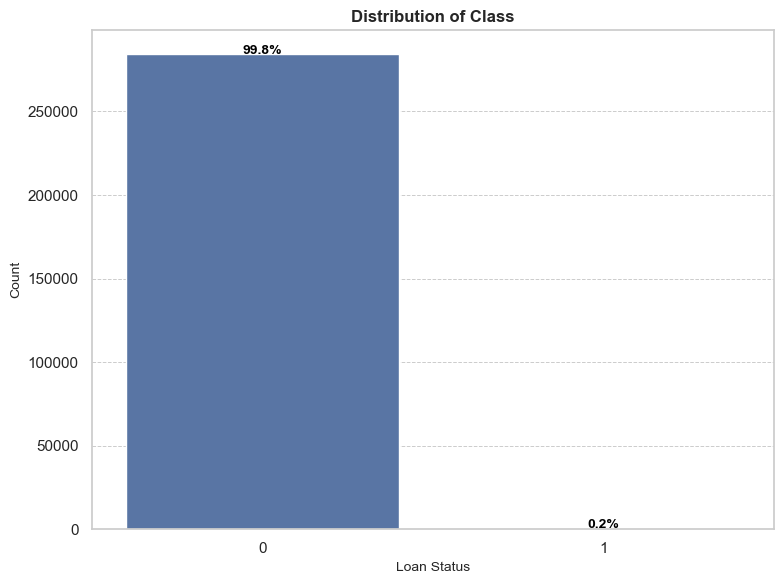

In [7]:
# Set a style for the graph
sns.set_theme(style="whitegrid")

# Create the figure
plt.figure(figsize=(8, 6))

# Create the countplot
ax = sns.countplot(x='Class', data=df)

# Add title and axis labels with improved font sizes
plt.title('Distribution of Class', fontsize=12, fontweight='bold')
plt.xlabel('Loan Status', fontsize=10)
plt.ylabel('Count', fontsize=10)

# Add a legend
handles, labels = ax.get_legend_handles_labels()


# Calculate the total number of data points to compute percentages
total = len(df['Class'])

# Iterate over the bars
for p in ax.patches:
    # Calculate the percentage of each class
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    # Get the x-coordinate and y-coordinate for positioning the text
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 5  # Adjusted to place text above the bar
    # Place the text above the bar with a larger font
    ax.text(x, y, percentage, ha='center', fontsize=10, color='black', fontweight='bold')

# Add gridlines for better readability
plt.grid(visible=True, which='major', axis='y', linestyle='--', linewidth=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [8]:
# creates a dataset for numerical attributes
numerical_var= df.select_dtypes(include=['int64', 'float64','int32'])

In [9]:
# central tendency: mean, median
mean = pd.DataFrame(numerical_var.apply(np.mean)).T
median = pd.DataFrame(numerical_var.apply(np.median)).T

# distribution: std, min, max, range, skew, kurtosis
std = pd.DataFrame(numerical_var.apply(np.std)).T
min_value = pd.DataFrame(numerical_var.apply(min)).T
max_value = pd.DataFrame(numerical_var.apply(max)).T
range_value = pd.DataFrame(numerical_var.apply(lambda x: x.max() - x.min())).T
skewness = pd.DataFrame(numerical_var.apply(lambda x: x.skew())).T
kurtosis = pd.DataFrame(numerical_var.apply(lambda x: x.kurtosis())).T

# concatenates
summary_stats = pd.concat([min_value, max_value, range_value, mean, median, std, skewness, kurtosis]).T.reset_index()
summary_stats.columns = ['attributes','min','max','range','mean','median','std','skewness','kurtosis']
summary_stats

,attributes,min,max,range,mean,median,std,skewness,kurtosis
0,Time,0.000,172792.000,172792.000,94813.860,84692.000,47488.063,-0.036,-1.294
1,V1,-56.408,2.455,58.862,0.000,0.018,1.959,-3.281,32.487
2,V2,-72.716,22.058,94.773,-0.000,0.065,1.651,-4.625,95.773
3,V3,-48.326,9.383,57.708,-0.000,0.180,1.516,-2.240,26.620
4,V4,-5.683,16.875,22.559,0.000,-0.020,1.416,0.676,2.635
5,V5,-113.743,34.802,148.545,0.000,-0.054,1.380,-2.426,206.905
6,V6,-26.161,73.302,99.462,0.000,-0.274,1.332,1.827,42.642
7,V7,-43.557,120.589,164.147,-0.000,0.040,1.237,2.554,405.607
8,V8,-73.217,20.007,93.224,0.000,0.022,1.194,-8.522,220.587
9,V9,-13.434,15.595,29.029,-0.000,-0.051,1.099,0.555,3.731


<b>Key Observations</b>

- The variable named **Class** has a mean value of 0.0017, suggesting that only about 0.17% of the data belongs to the minority class (fraudulent transactions), while the remaining 99.83% belong to the majority class and this shows the  extrem class  imbalanc,ewhich can  lead to biased models that overly favor the majority class, resulting in poor performance for the minority clas

- Variables like V6, V7, V21, and V28 are right-skewed, indicating a concentration of values on the lower end with a long right tail.

- The range of the attributes, especially features like V5, V7, and V28, is large, indicating the presence of substantial variability within the data. This variability could indicate that certain features have outliers or extreme values influencing the overall distribution

- Many features, including V5, V7, and V28, have extremely high kurtosis (e.g., V7 has a kurtosis of 405.6074), indicating heavy tails, i.e., these features might have several extreme values or outliers.
  s

## Data Cleaning 

In [10]:
#First we need to copy and save a copy of our dataset before we proceed with cleaning in case of errors
df_copy = df.copy()

In [11]:
#Saving the data to excel
#df_copy.to_excel('df_copy.xlsx')

In [12]:
# Check out the missing values
missing_count = df.isnull().sum()
value_count = df.isnull().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
missing_df.T

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
percentage,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [13]:
# The classes are heavily skewed; we need to address this issue later.
no_fraud = df['Class'].value_counts()[0]
fraud = df['Class'].value_counts()[1]
total = len(df)

imbalance_ratio = round(no_fraud / fraud, 2)  # Imbalance ratio calculation

print('No Frauds:', round(no_fraud / total * 100, 2), '% of the dataset')
print('Frauds:', round(fraud / total * 100, 2), '% of the dataset')
print('Imbalance Ratio (No Fraud : Fraud) =', imbalance_ratio, ': 1')


No Frauds: 99.83 % of the dataset
Frauds: 0.17 % of the dataset
Imbalance Ratio (No Fraud : Fraud) = 577.88 : 1


- From above no column has missing data values 

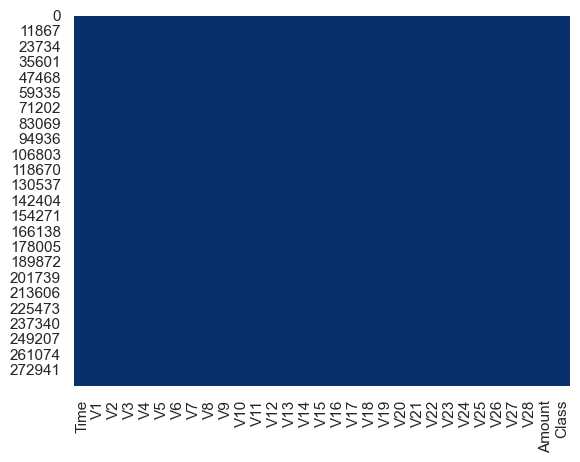

In [14]:
#Confirming the missing values using visual plot
sns.heatmap(df.isnull(), cbar=False, cmap='Blues_r')
# Show the plot
plt.show()

In [15]:
#Checking the duplicates in the column
df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [16]:
#Checking and Dropping duplicates in the data
def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")
duplicate_values(df)

Duplicate check...
There are 1081 duplicated observations in the dataset.
1081 duplicates were dropped!
No more duplicate rows!


In [17]:
# checking boxplots
numeric_columns = (list(df.loc[:, 'V1':'Amount']))
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,25))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=df, columns_list=numeric_columns, rows=10, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

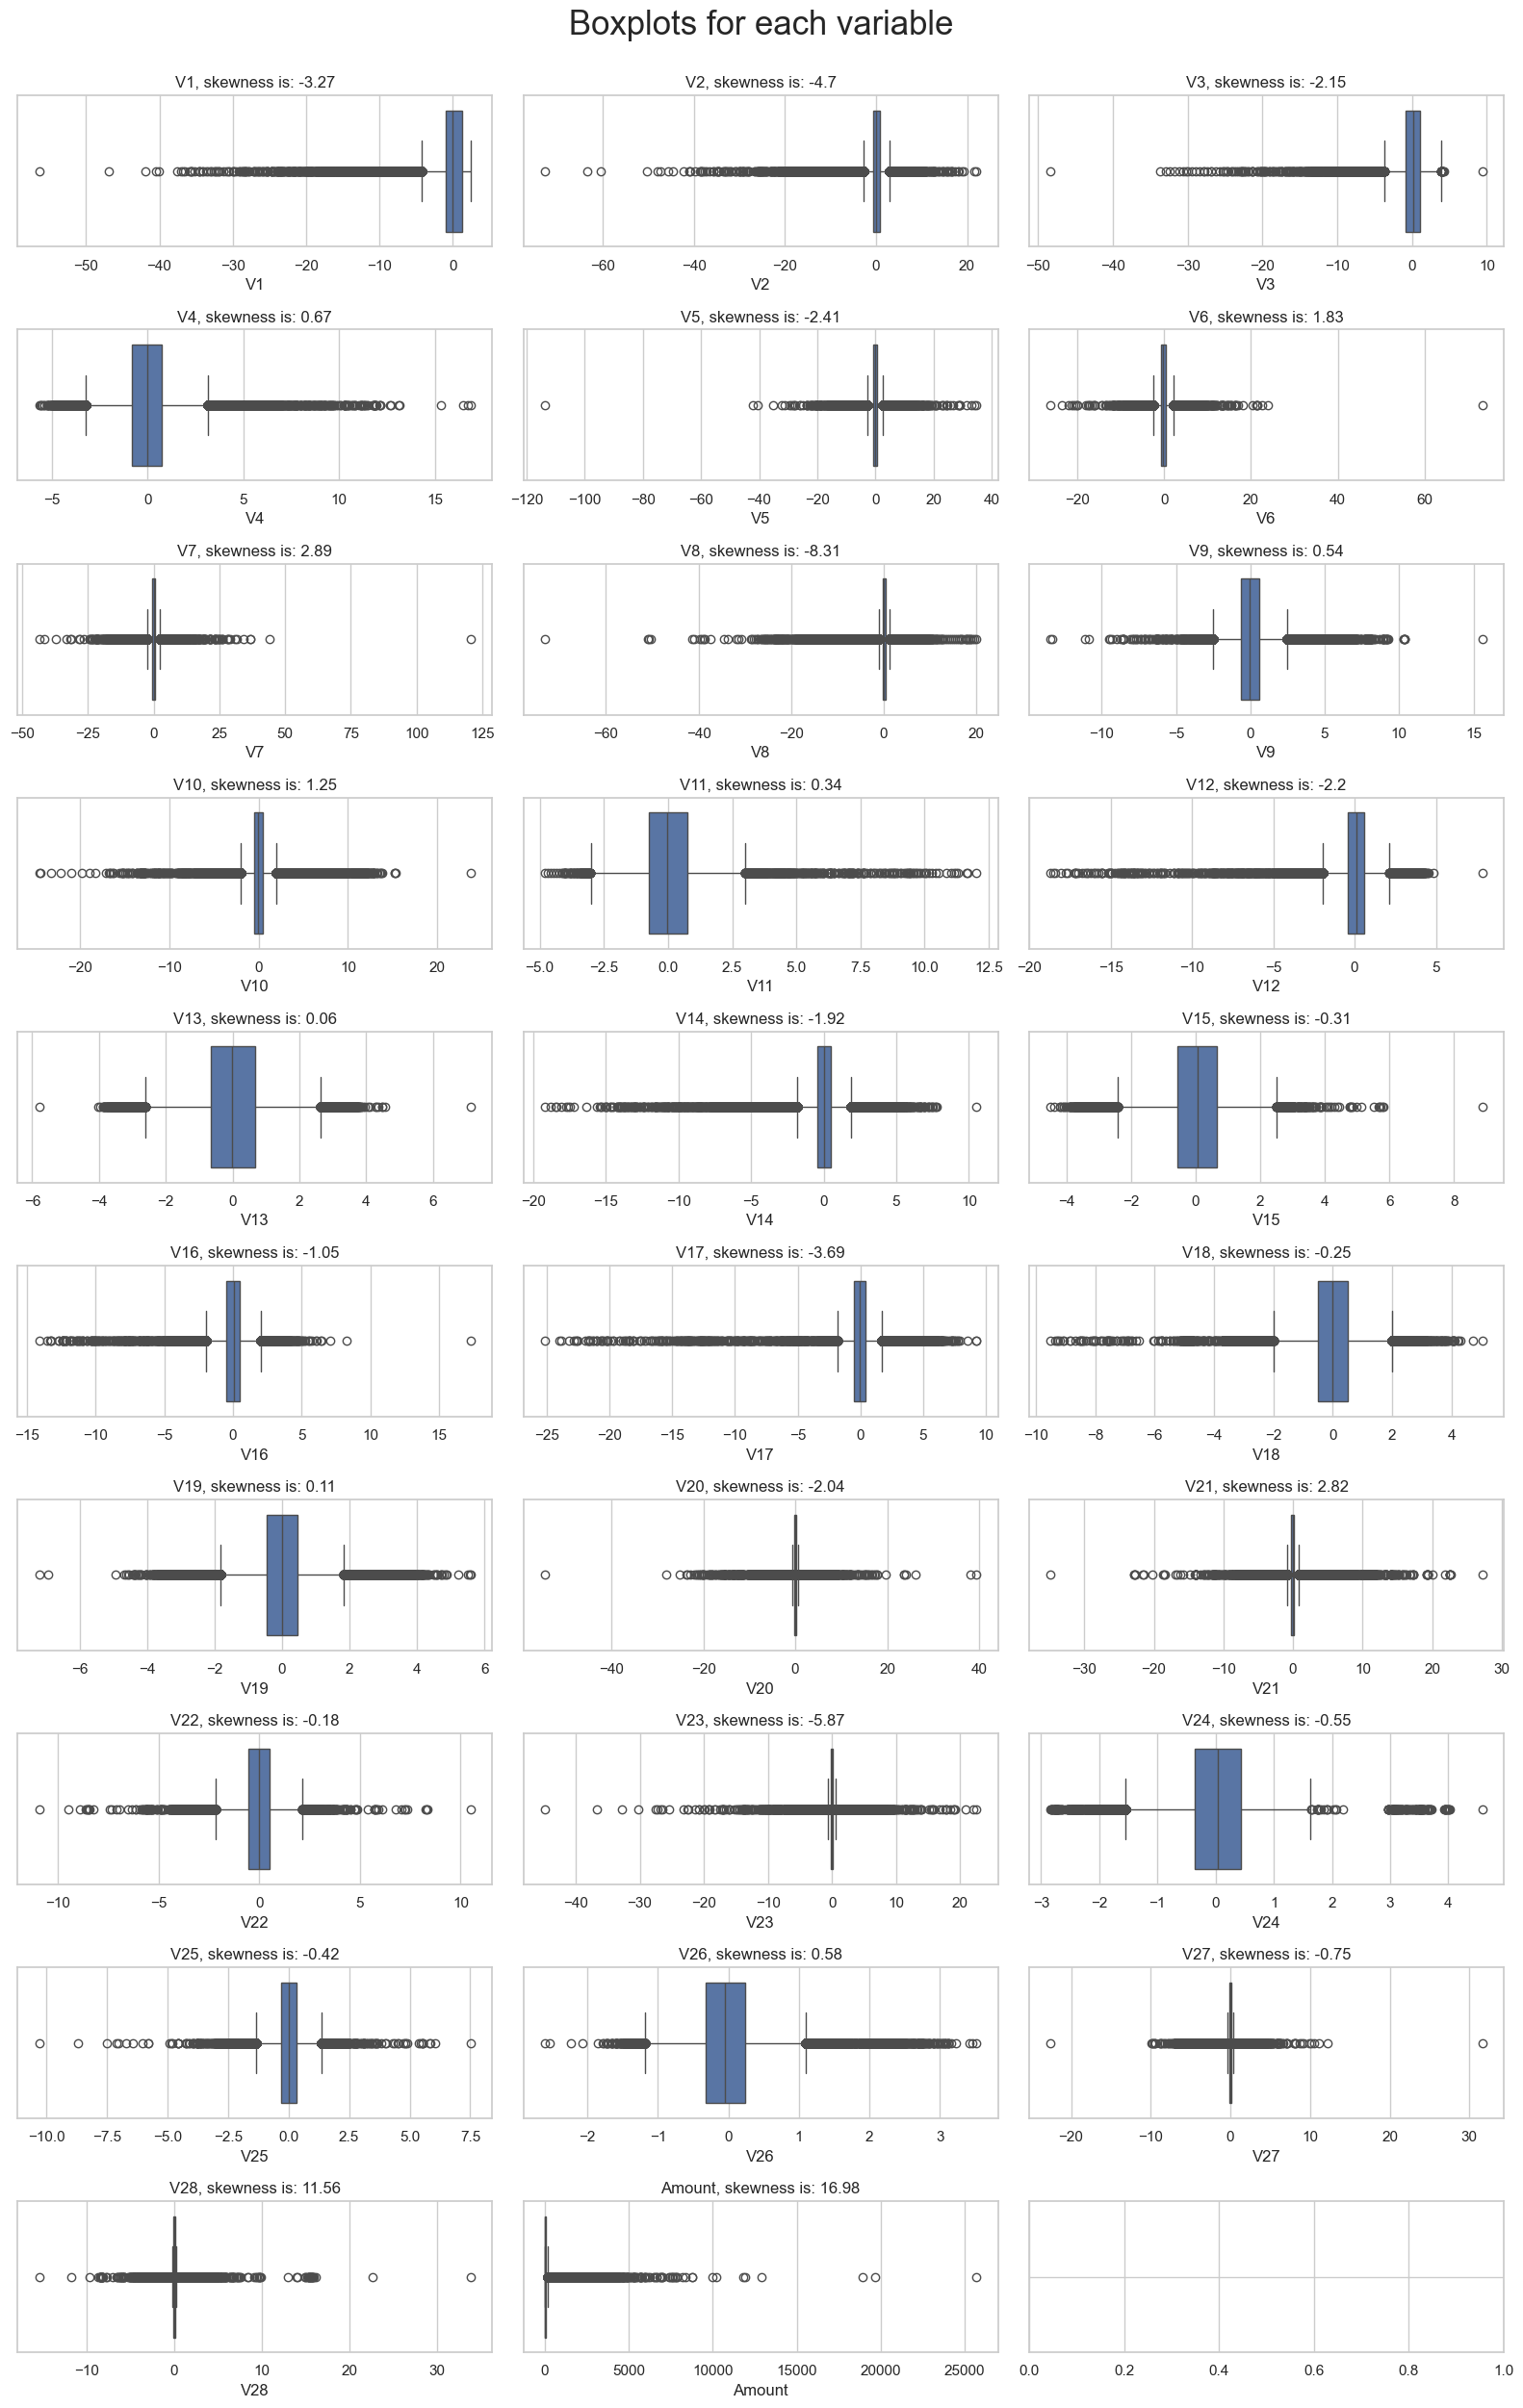

In [18]:
plt.show()

In [19]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


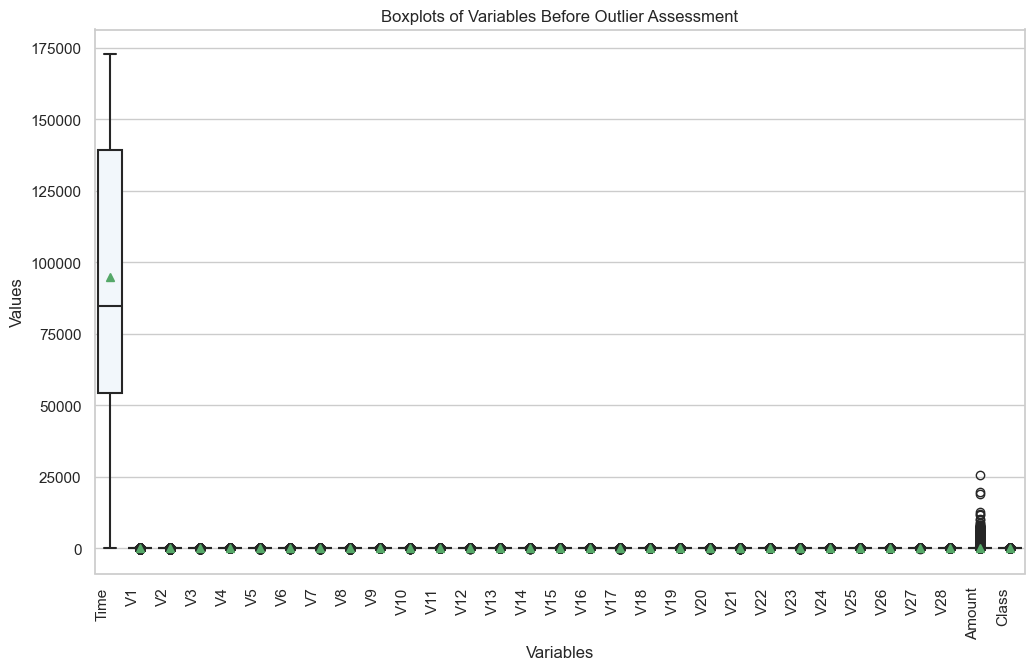

In [20]:
# Create a figure with adjusted size for better clarity
plt.figure(figsize=(12, 8))

sns.boxplot(
    showmeans=True,  # Display mean values as markers
    data=df,
    orient="v",  # Vertical orientation for boxplots
    linewidth=1.5,  # Adjust line width for better visibility
    palette='Blues'
)

# Customize x-axis labels (assuming they are column names in df)
plt.xticks(rotation=90, ha="right")  # Rotate x-axis labels for readability
plt.xlabel("Variables", fontsize=12)  # Set x-axis label

# Customize y-axis label
plt.ylabel("Values", fontsize=12)  # Set y-axis label
plt.title('Boxplots of Variables Before Outlier Assessment')
# Adjust spacing between subplots
plt.subplots_adjust(bottom=0.2)  # Adjust bottom margin to avoid overlapping titles

# Display the plot
plt.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

- From above the variable named **Amount** is the one with significant outliers. 

In [22]:
# List of columns to check for outliers
columns_to_check = ['Amount']

# Function to calculate Z-scores and identify outliers
def detect_outliers_zscore(df, columns):
    outlier_summary = {}
    for col in columns:
        # Calculate Z-scores
        z_scores = (df[col] - df[col].mean()) / df[col].std()

        # Identify outliers (Z-score > 3 or < -3)
        outliers = df[np.abs(z_scores) > 3]

        # Summary for the column
        outlier_summary[col] = {
            'Total Outliers': len(outliers),
            'Outlier Percentage': (len(outliers) / len(df)) * 100,
            'Outlier Indices': outliers.index.tolist()
        }
    return outlier_summary

# Run outlier detection
outlier_report = detect_outliers_zscore(df, columns_to_check)

# Display the outlier summary
for col, stats in outlier_report.items():
    print(f"Column: {col}")
    print(f"Total Outliers: {stats['Total Outliers']}")
    print(f"Outlier Percentage: {stats['Outlier Percentage']:.2f}%")

Column: Amount
Total Outliers: 4063
Outlier Percentage: 1.43%


In [23]:
# Loop through each column and drop outliers
col = ['Amount']
for col in col:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Filter the DataFrame to remove outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

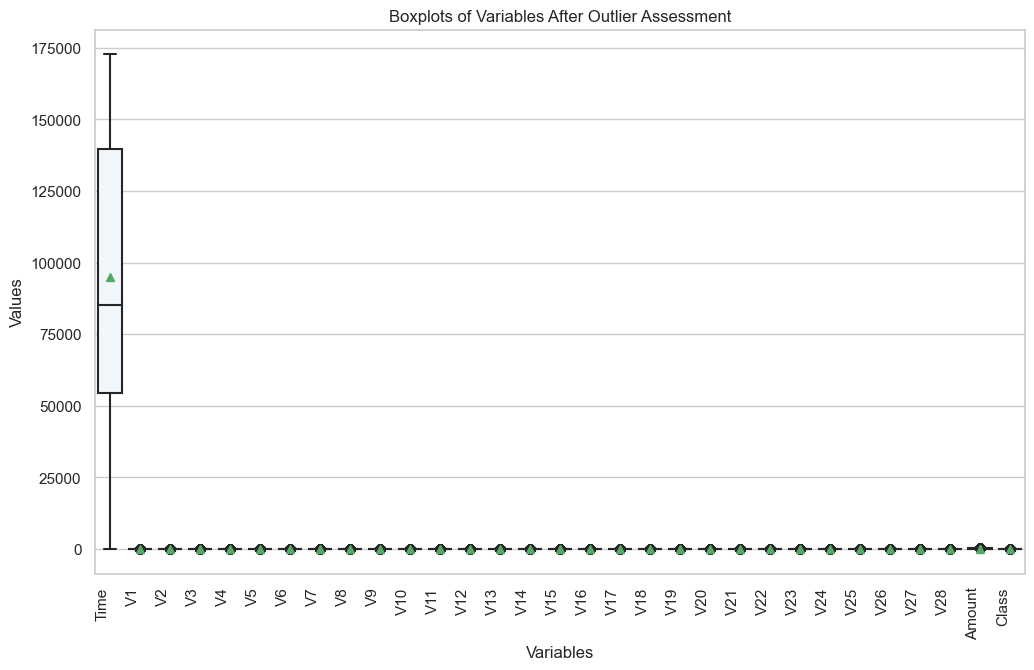

In [24]:
# Create a figure with adjusted size for better clarity
plt.figure(figsize=(12, 8))

sns.boxplot(
    showmeans=True,  # Display mean values as markers
    data=df,
    orient="v",  # Vertical orientation for boxplots
    linewidth=1.5,  # Adjust line width for better visibility
    palette='Blues'
)

# Customize x-axis labels 
plt.xticks(rotation=90, ha="right")  # Rotate x-axis labels for readability
plt.xlabel("Variables", fontsize=12)  # Set x-axis label

# Customize y-axis label
plt.ylabel("Values", fontsize=12)  # Set y-axis label
plt.title('Boxplots of Variables After Outlier Assessment')
# Adjust spacing between subplots
plt.subplots_adjust(bottom=0.2)  # Adjust bottom margin to avoid overlapping titles

# Display the plot
plt.show()

- The above graph show that there is no longer significant outliers in the dataset after outlier assesment 


## Exploratory Data Analysis

<b>Key Observations</b>
- The distribution of transaction amounts is highly skewed to the right, indicating that most transaction amounts are concentrated in the lower range, which is below 50, while fewer transactions occur at higher amounts. The smooth curve overlays the histogram, showing the overall density trend.
  
- The distribution of transaction times appears bimodal, meaning there are two distinct peaks, possibly corresponding to two separate clusters of transaction activity within specific time periods. 

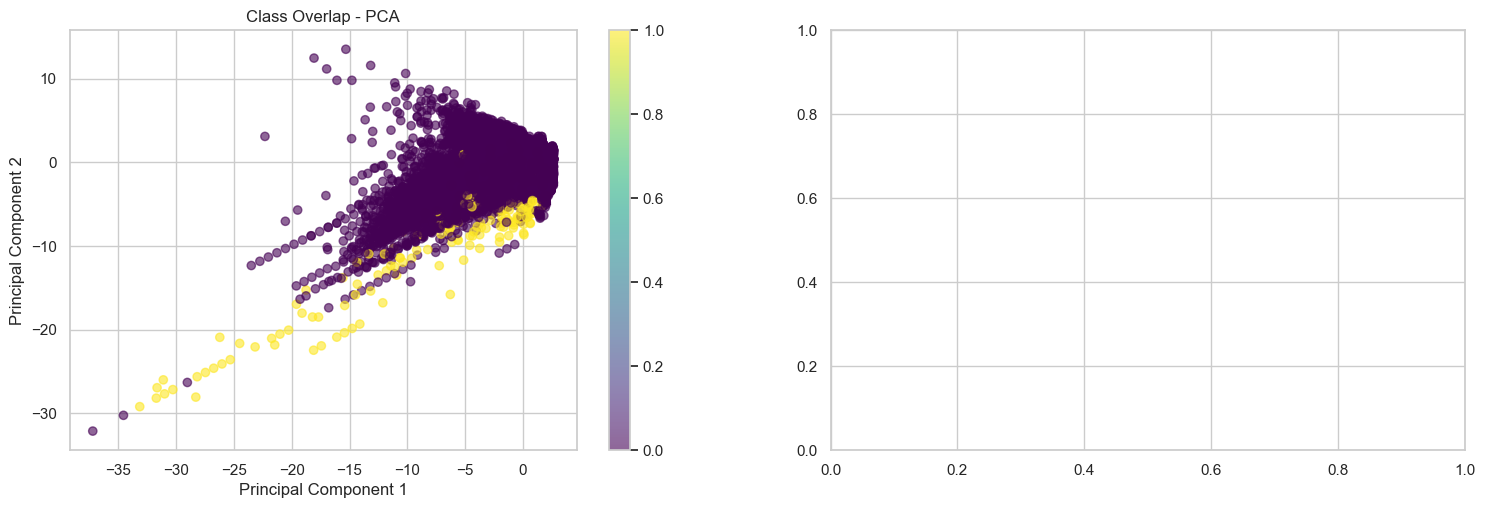

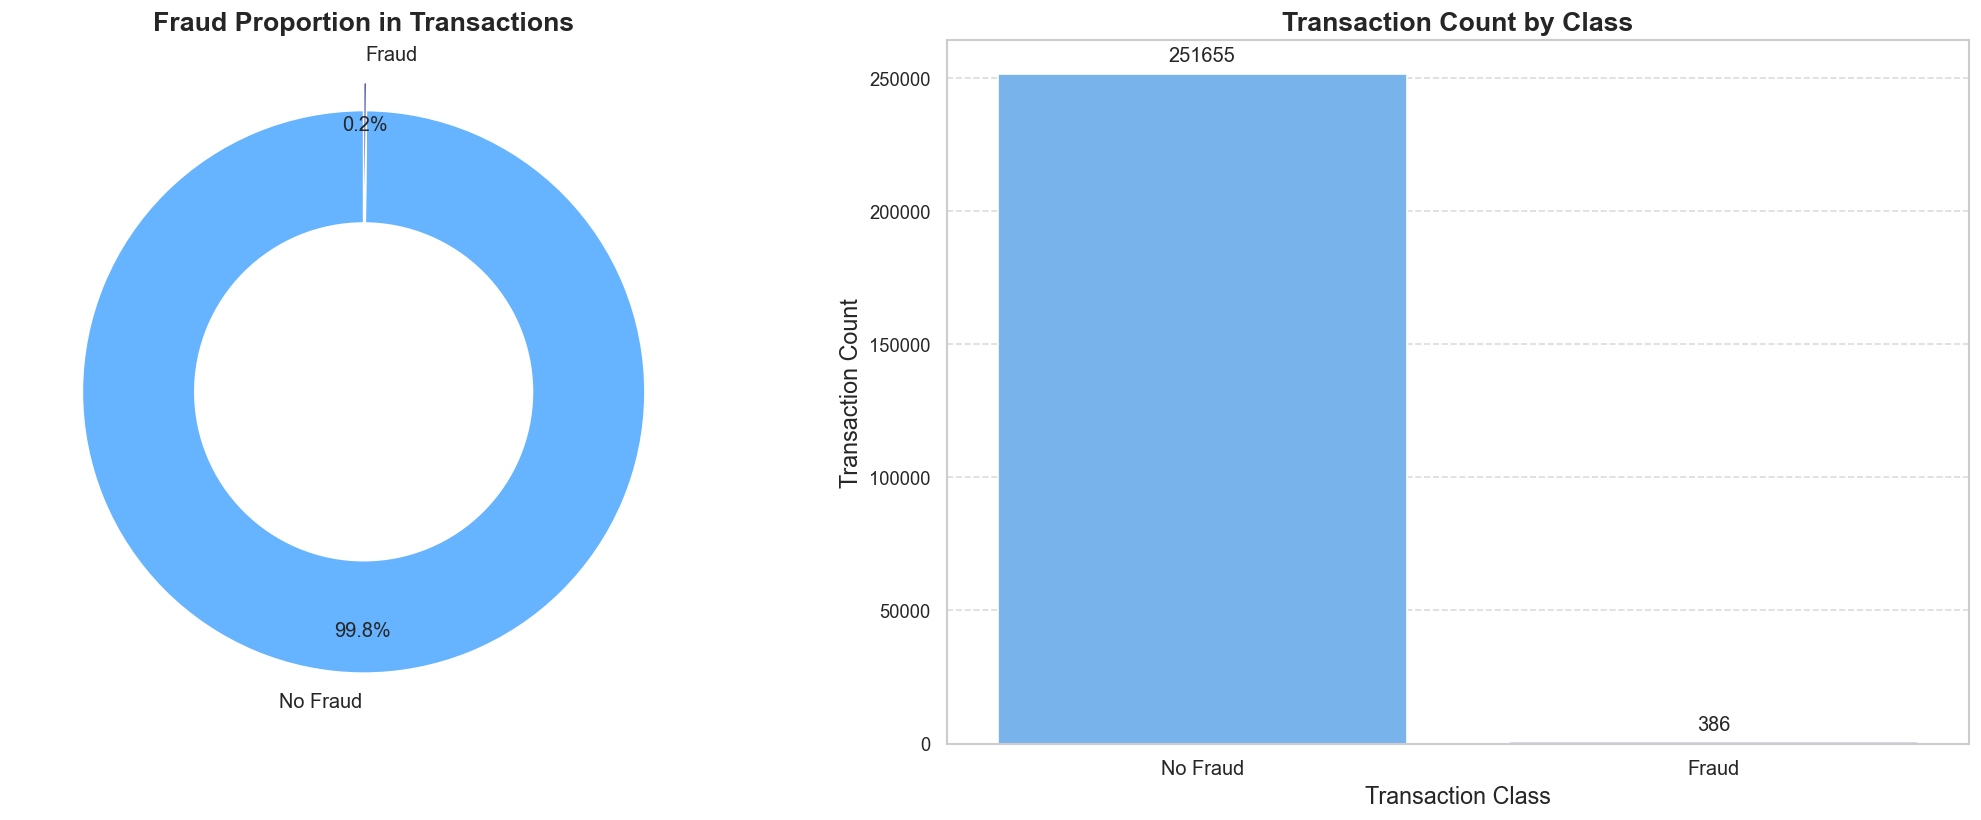

In [57]:
# Calculate value counts for fraud (1) and non-fraud (0)
donut_data = df['Class'].value_counts()
labels = ["No Fraud", "Fraud"]

# Setting up the figure for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(18, 7), dpi=120)

### Donut Chart ###
explode = (0, 0.1)  # Explode the "Fraud" section for emphasis
axes[0].pie(
    donut_data, 
    labels=labels, 
    autopct="%1.1f%%", 
    pctdistance=0.85, 
    explode=explode, 
    startangle=90, 
    colors=['#66b3ff', 'darkblue'],  # No Fraud: Light Blue, Fraud: Dark Blue
    textprops={'fontsize': 12}  # Adjust font size for readability
)
# Create a circle at the center to achieve the donut effect
centre_circle = plt.Circle((0, 0), 0.60, fc='white')  
axes[0].add_artist(centre_circle)
axes[0].set_title("Fraud Proportion in Transactions", fontsize=16, fontweight='bold')

### Bar Chart ###
sns.barplot(
    x=donut_data.index, 
    y=donut_data.values, 
    ax=axes[1], 
    palette=['#66b3ff', 'darkblue']  # Matching color scheme with the donut chart
)
# Add value labels on the bars
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%d', padding=5, fontsize=12)
axes[1].set_xticks([0, 1])  # Ensure the ticks align with "No Fraud" and "Fraud"
axes[1].set_xticklabels(labels, fontsize=12)
axes[1].set_xlabel("Transaction Class", fontsize=14)
axes[1].set_ylabel("Transaction Count", fontsize=14)
axes[1].set_title("Transaction Count by Class", fontsize=16, fontweight='bold')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

### Adjust Layout ###
plt.tight_layout()
plt.show()

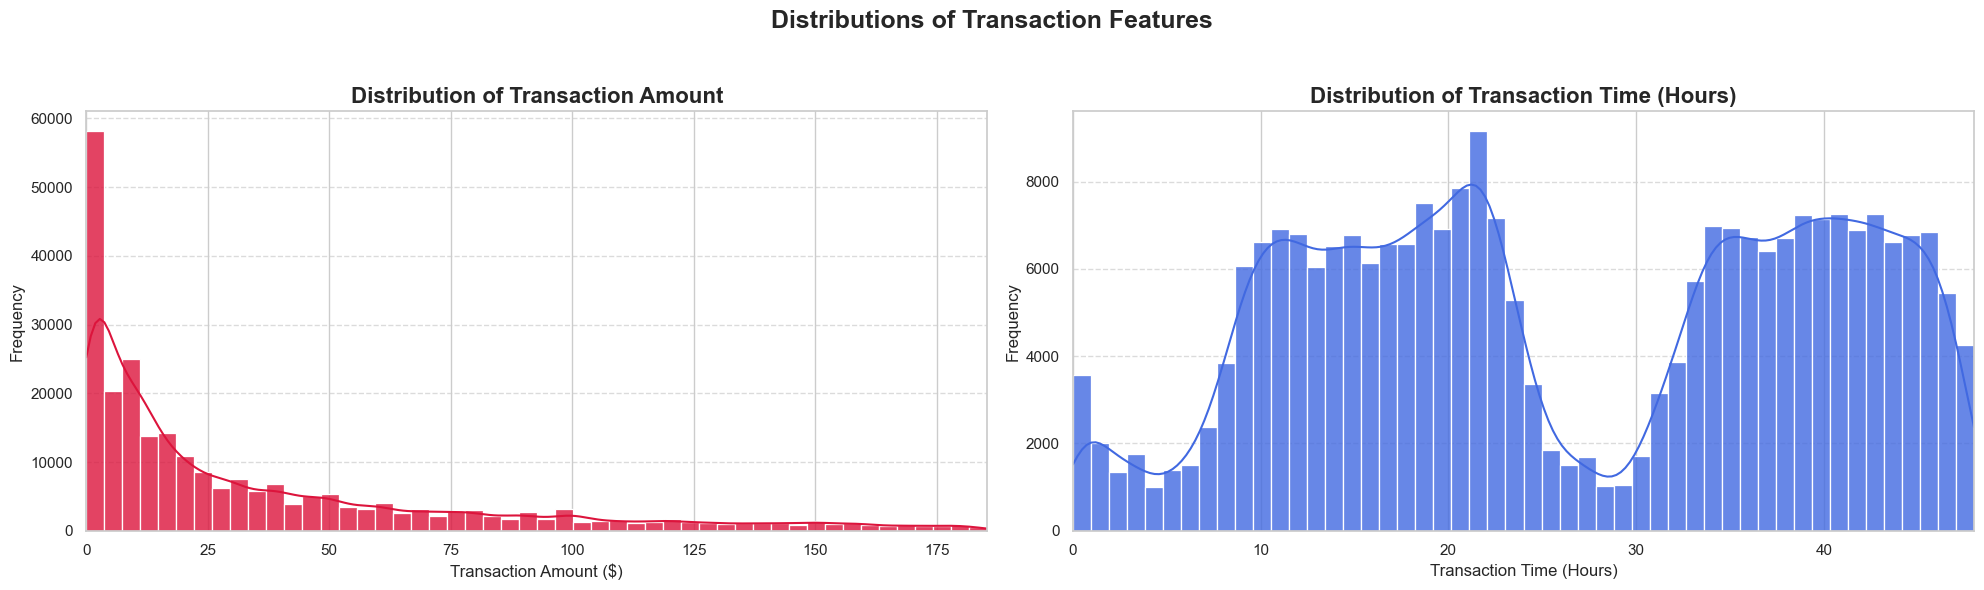

In [26]:
# Convert 'Time' from seconds to hours
time_val_hours = df['Time'].values / 3600  # Convert seconds to hours

# Extract 'Amount' values
amount_val = df['Amount'].values

# Set up the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
fig.suptitle('Distributions of Transaction Features', fontsize=18, fontweight='bold')

# Distribution of Transaction Amount
sns.histplot(amount_val, ax=ax[0], color='crimson', kde=True, bins=50, alpha=0.8)
ax[0].set_title('Distribution of Transaction Amount', fontsize=16, fontweight='bold')
ax[0].set_xlabel('Transaction Amount ($)', fontsize=12)
ax[0].set_ylabel('Frequency', fontsize=12)
ax[0].grid(axis='y', linestyle='--', alpha=0.7)
ax[0].set_xlim([min(amount_val), max(amount_val)])

# Distribution of Transaction Time (in hours)
sns.histplot(time_val_hours, ax=ax[1], color='royalblue', kde=True, bins=50, alpha=0.8)
ax[1].set_title('Distribution of Transaction Time (Hours)', fontsize=16, fontweight='bold')
ax[1].set_xlabel('Transaction Time (Hours)', fontsize=12)
ax[1].set_ylabel('Frequency', fontsize=12)
ax[1].grid(axis='y', linestyle='--', alpha=0.7)
ax[1].set_xlim([min(time_val_hours), max(time_val_hours)])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the suptitle

# Show the plot
plt.show()


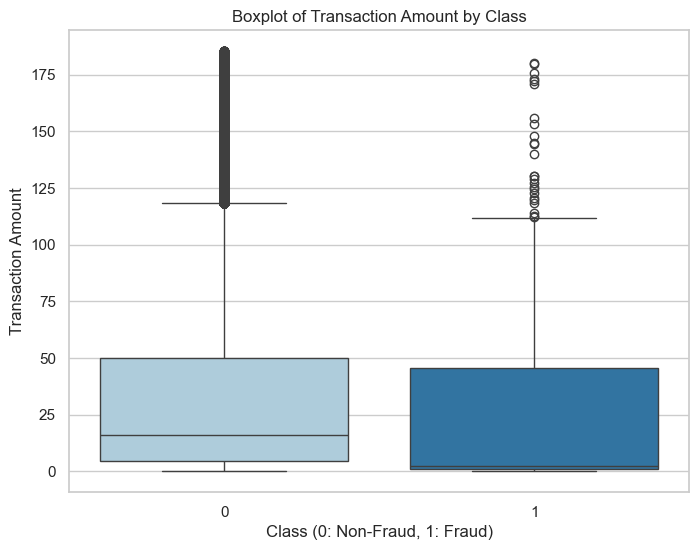

In [27]:
# Boxplots for 'Amount' grouped by 'Class'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=df, palette='Paired')
plt.title("Boxplot of Transaction Amount by Class")
plt.xlabel("Class (0: Non-Fraud, 1: Fraud)")
plt.ylabel("Transaction Amount")
plt.show()

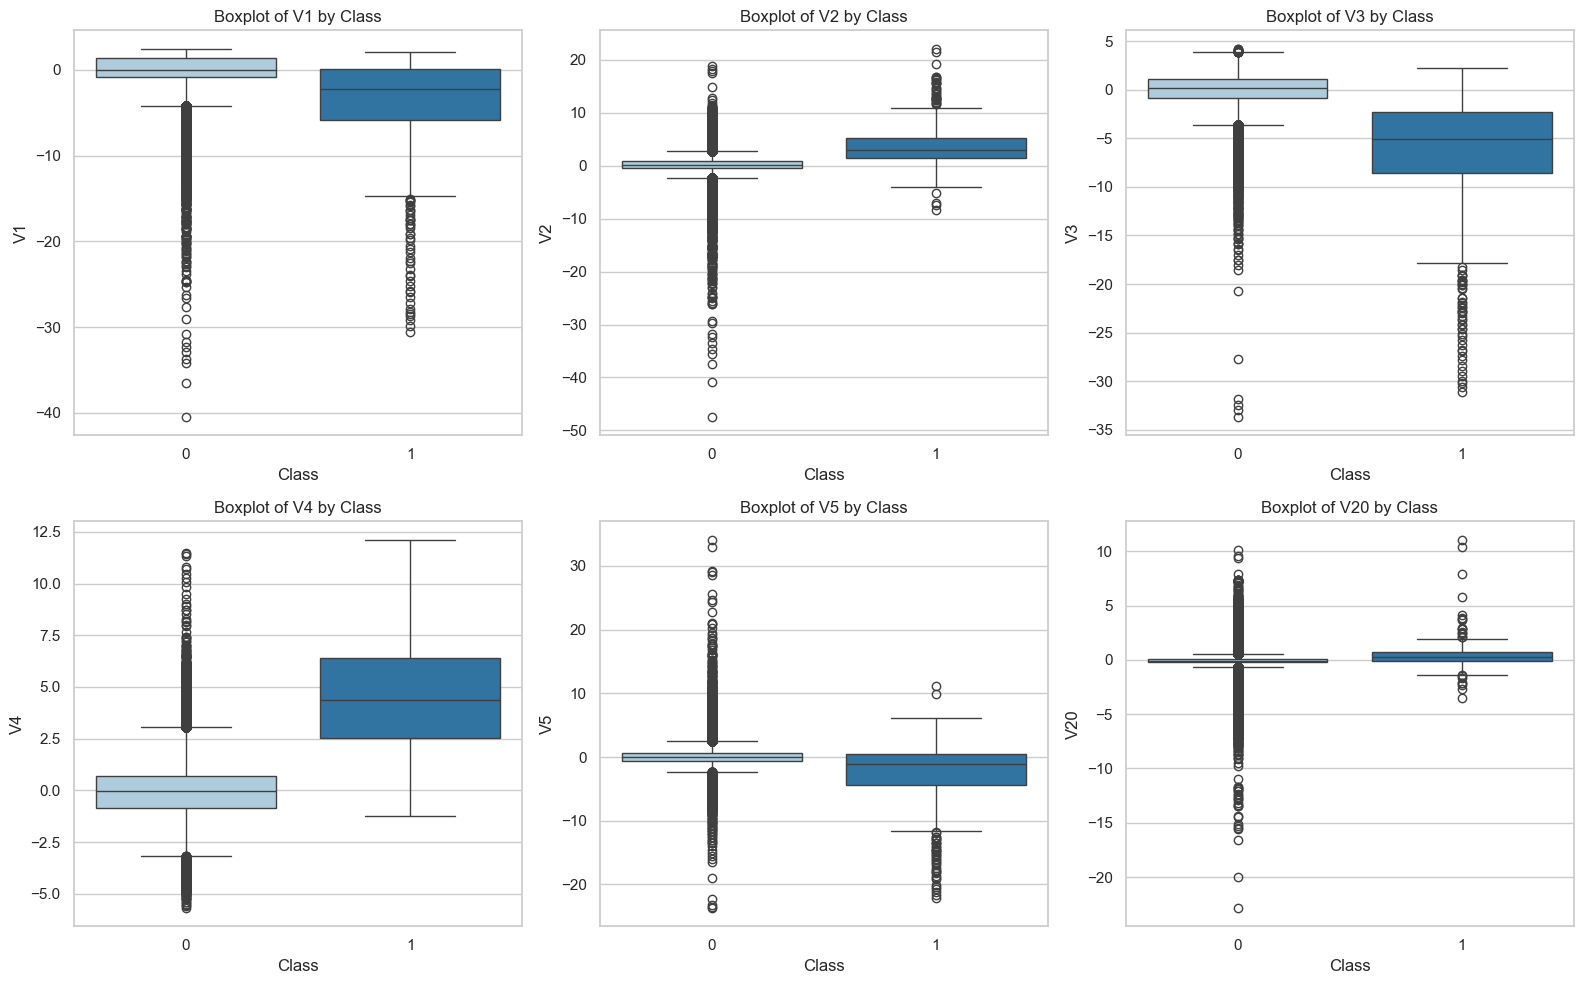

In [28]:
# Outlier detection using boxplots for selected features
selected_features = ['V1', 'V2', 'V3', 'V4', 'V5','V20']
plt.figure(figsize=(16, 10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Class', y=feature, data=df, palette='Paired')
    plt.title(f"Boxplot of {feature} by Class")
    plt.xlabel("Class")
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

# Pairplot for a subset of features including the target variable
subset_features = ['V10', 'V28', 'V3', 'V4', 'Class']
sns.pairplot(df[subset_features], hue='Class', palette="Paired", diag_kind='kde')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

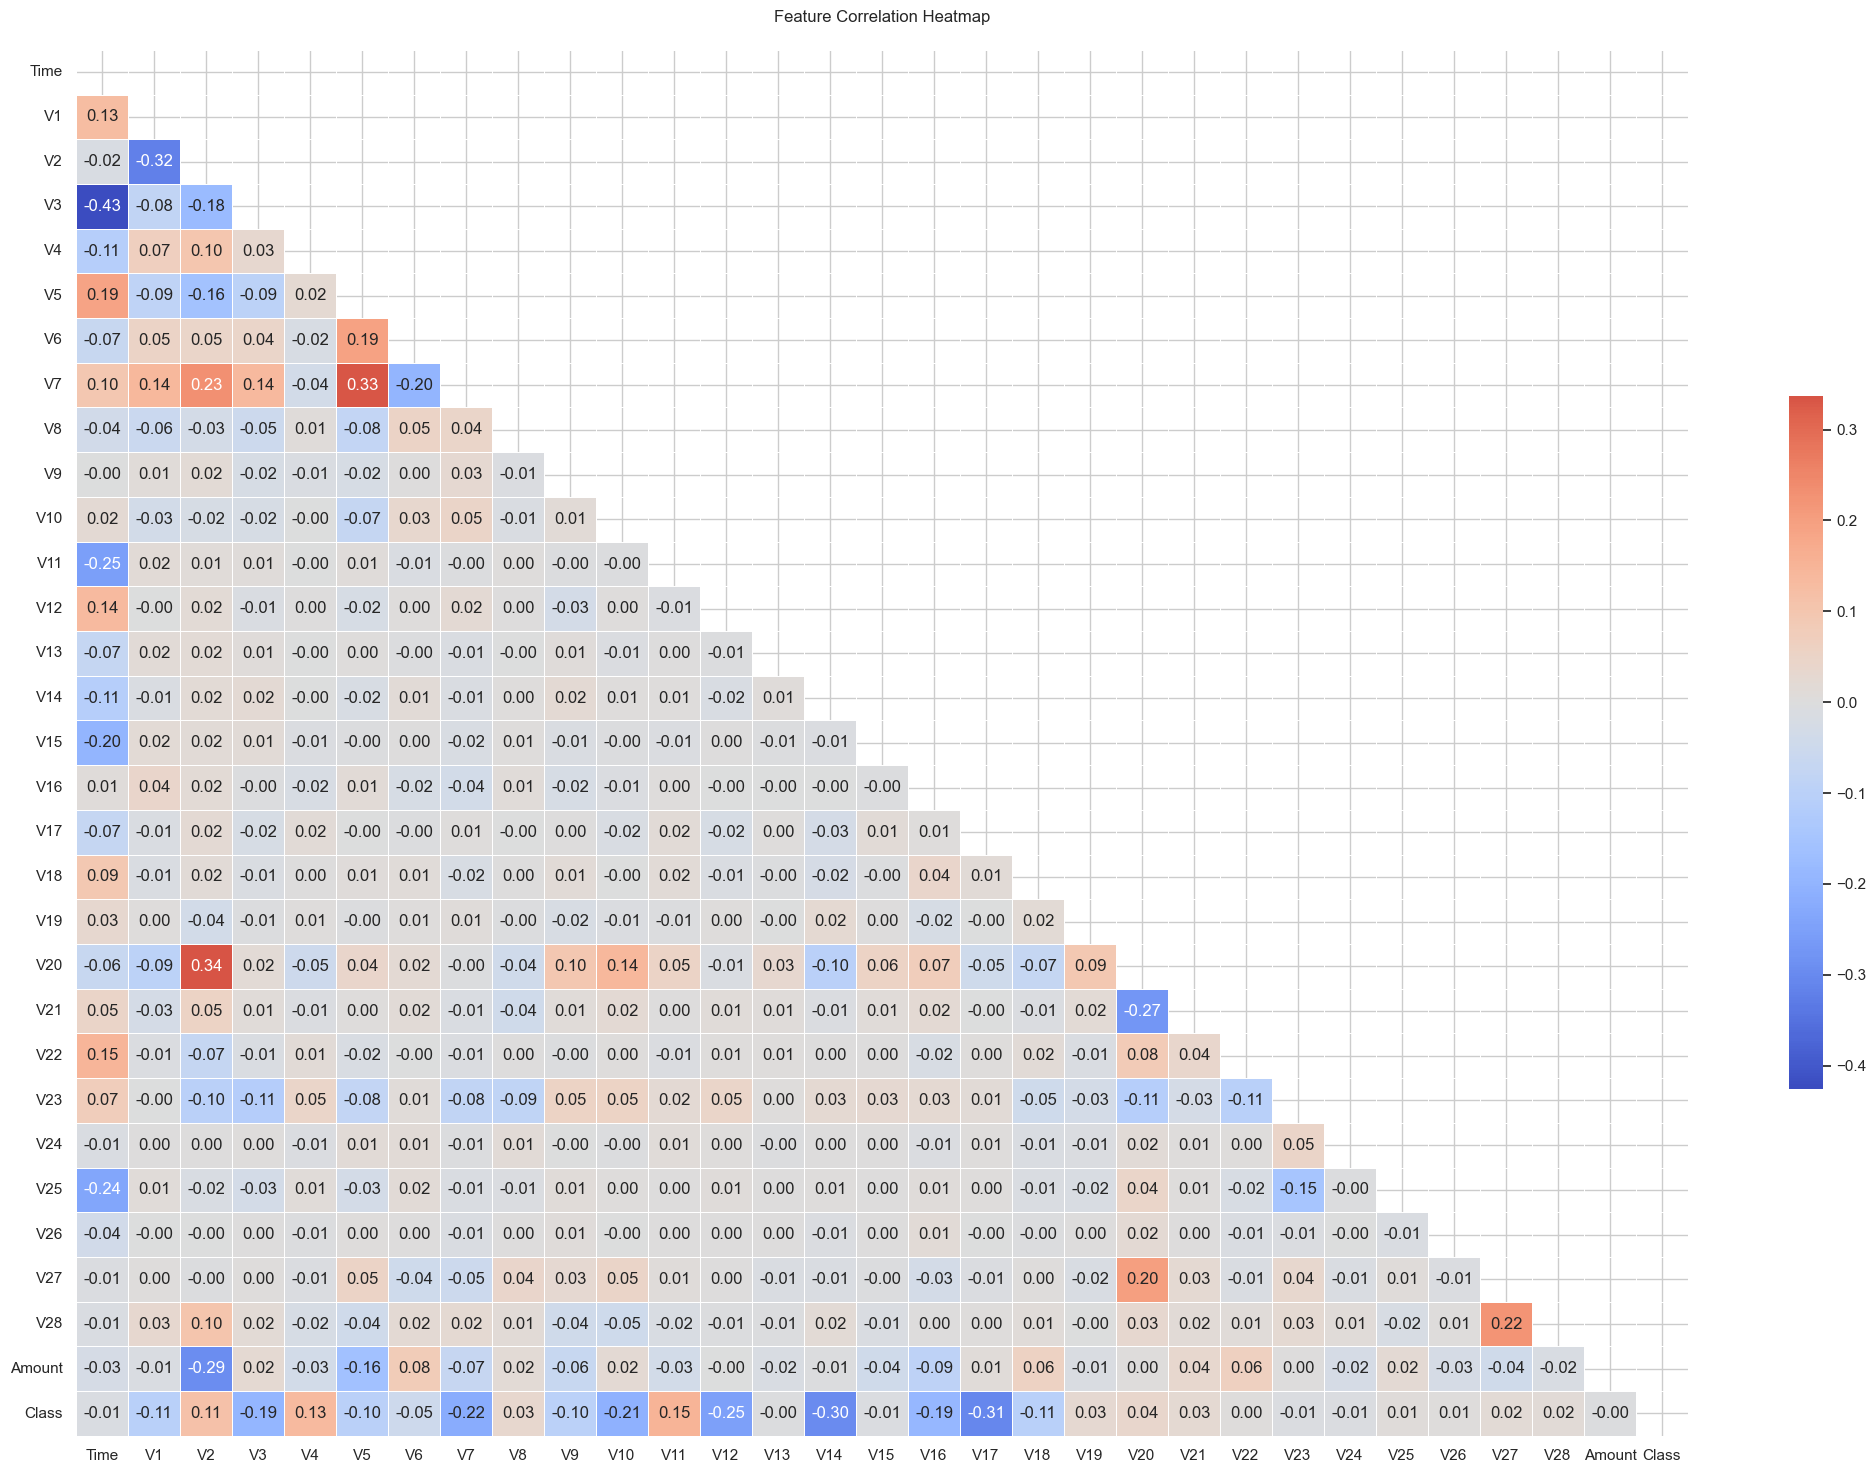

In [29]:
def create_correlation_heatmap(df):
        """Create correlation heatmap with enhanced styling"""
        plt.figure(figsize=(26, 18))
        
        # Calculate correlations
        corr_matrix = df.corr()
        
        # Create mask for upper triangle
        mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
        
        # Create heatmap
        sns.heatmap(corr_matrix, 
                   mask=mask,
                   annot=True, 
                   fmt='.2f',
                   cmap='coolwarm',
                   center=0,
                   square=False,
                   linewidths=0.5,
                   cbar_kws={"shrink": .5})
        
        plt.title('Feature Correlation Heatmap', pad=20)
        return plt.gcf()
create_correlation_heatmap(df)
plt.show()

In [30]:
df['Hour'] = df['Time'].apply(lambda x: np.ceil(float(x)/3600) % 24)

In [31]:
#Class vs Amount vs Hour
pd.pivot_table(
    columns="Class", 
    index="Hour", 
    values= 'Amount', 
    aggfunc='count', 
    data=df)


Class,0,1
Hour,,
0.000,9922,10
1.000,7083,3
2.000,3885,7
3.000,3023,43
4.000,3290,17
5.000,1976,21
6.000,2801,9
7.000,3768,7
8.000,6664,22


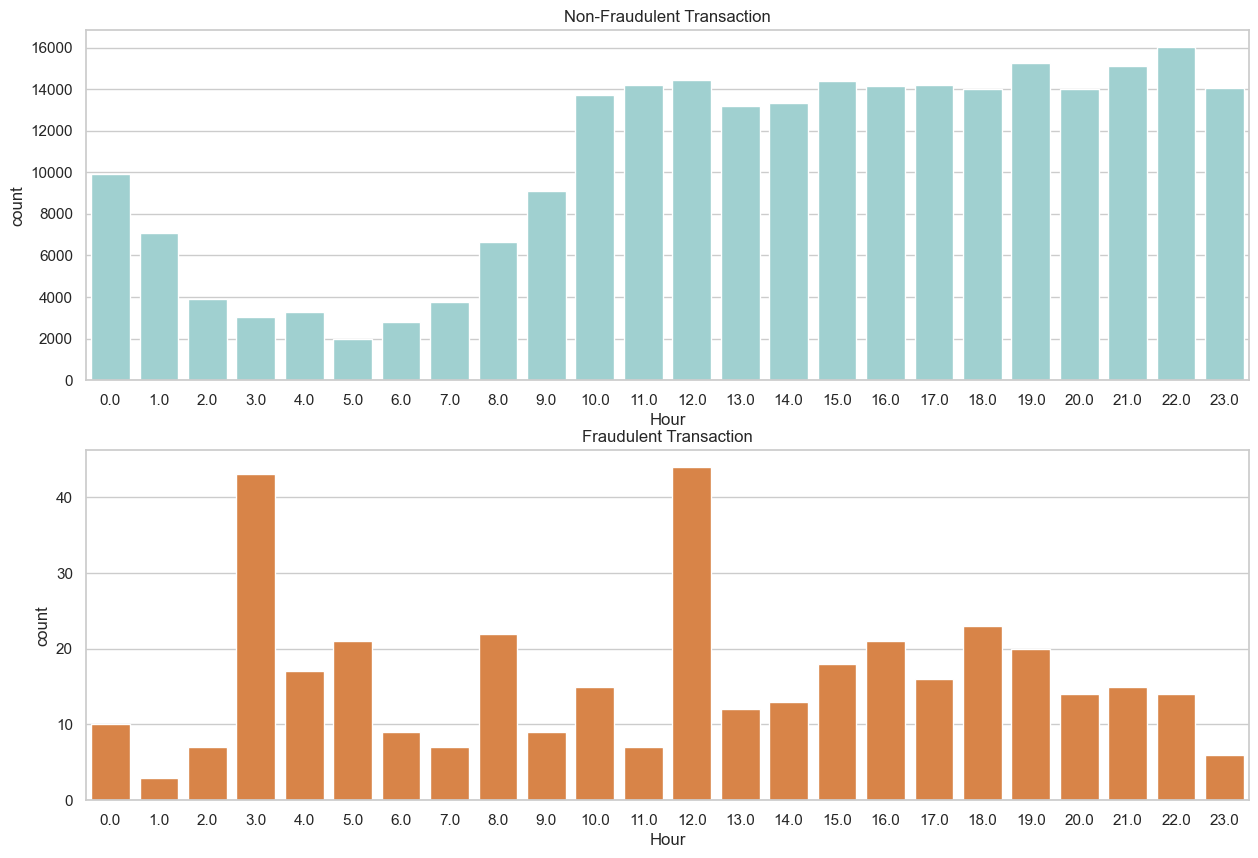

In [32]:
#Hour vs Class
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

sns.countplot(
    x="Hour",
    data=df[df['Class'] == 0], 
    color="#98D8D8",  
    ax=axes[0])
axes[0].set_title("Non-Fraudulent Transaction")


sns.countplot(
    x="Hour",
    data=df[df['Class'] == 1],
    color="#F08030", 
    ax=axes[1])
axes[1].set_title("Fraudulent Transaction")

plt.show()

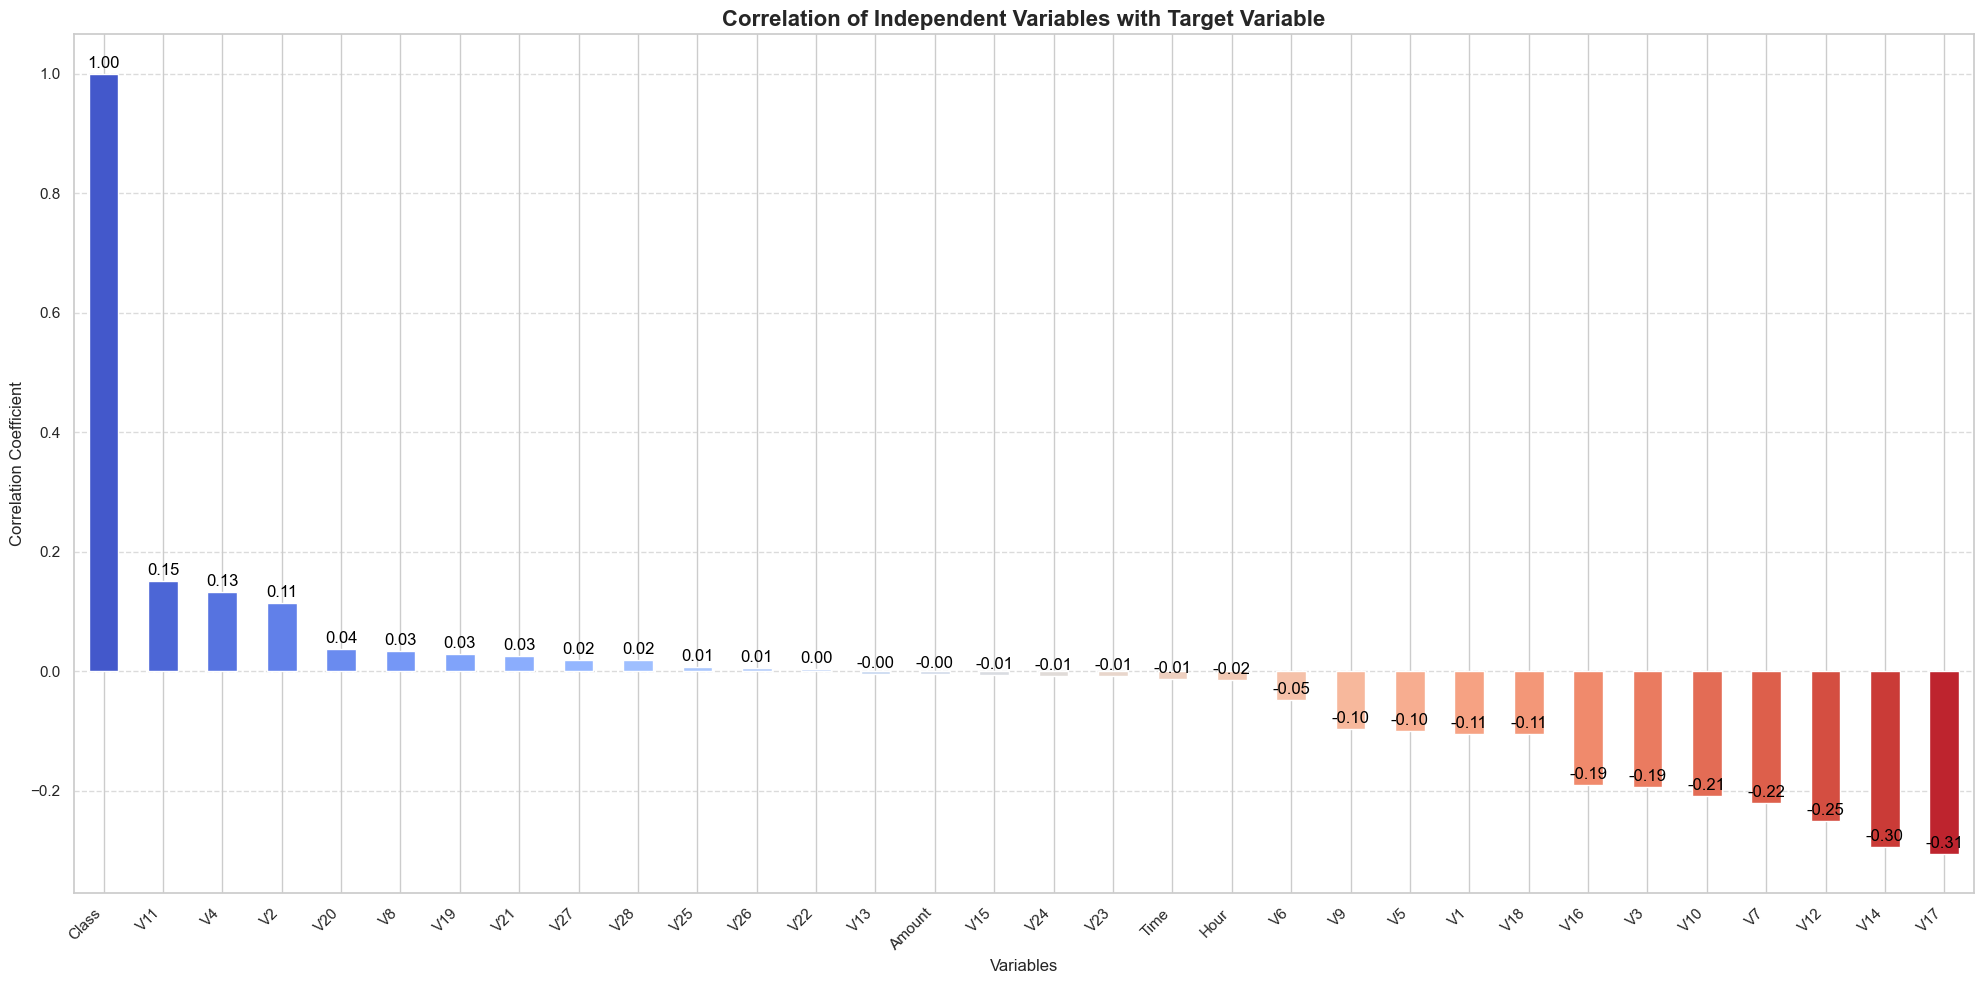

In [33]:
plt.figure(figsize=(20, 10))  # Adjust figure size for better readability

# Calculate correlation and sort values
corr = df.corr()['Class'].sort_values(ascending=False)

# Use Seaborn's color palette for a more visually appealing plot
colors = sns.color_palette("coolwarm", len(corr))  # 'coolwarm' for diverging colors

# Create the bar plot with the color palette
ax = corr.plot(kind='bar', color=colors)

# Add titles and labels
plt.title('Correlation of Independent Variables with Target Variable', fontsize=16, fontweight='bold')
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)

# Add value labels to the bars for better understanding
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.01,
            f'{p.get_height():.2f}', ha='center', color='black')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent overlapping elements

# Add subtle gridlines for better appearance
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot as an image to your device
plt.savefig('Correlation_of_Independent_Variables_with_Target_Variable.png', dpi=300)

# Show the plot
plt.show()

In [34]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [35]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Hour
0,2.935,-1.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,...,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,0,0.000
1,-0.293,-1.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,...,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,0,0.000
3,2.361,-1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,...,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,0,1.000
4,1.186,-1.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,...,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,0,1.000
5,-0.272,-1.000,-0.426,0.961,1.141,-0.168,0.421,-0.030,0.476,0.260,...,-0.208,-0.560,-0.026,-0.371,-0.233,0.106,0.254,0.081,0,1.000


In [36]:
df = df.drop(columns=['Hour'])  # Preferred method


In [37]:

df = df.sample(frac=1)


# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
88897,-0.328,-0.267,-5.268,2.507,-5.291,4.886,-3.343,-1.100,-5.811,1.726,...,-0.286,0.764,0.473,0.548,-0.157,-0.710,-0.366,-1.487,0.678,1
172787,2.826,0.426,-2.629,2.276,-3.745,1.227,-1.133,-1.256,-1.752,0.282,...,0.133,0.871,1.269,-0.265,-0.481,0.170,0.096,0.070,0.064,1
122168,-0.067,-0.101,-1.196,-0.218,2.595,0.594,1.096,0.445,-0.234,0.190,...,0.315,-0.007,0.115,-0.239,-0.755,0.403,-0.325,-0.065,-0.130,0
151519,-0.316,0.124,-17.519,12.572,-19.039,11.191,-13.555,-0.412,-23.189,-5.301,...,2.529,-4.969,0.976,1.841,0.334,-0.720,-0.233,-3.022,-0.478,1
149577,-0.330,0.076,0.007,2.365,-2.600,1.112,3.276,-1.776,2.115,-0.830,...,-0.006,-0.564,-0.902,-0.404,-0.013,0.590,-0.734,-0.448,-0.362,1


In [38]:
# New_df is from the random undersample data (fewer instances)

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time


X = new_df.drop('Class', axis=1)
y = new_df['Class']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 7.8 s
PCA took 0.016 s
Truncated SVD took 0.0021 s


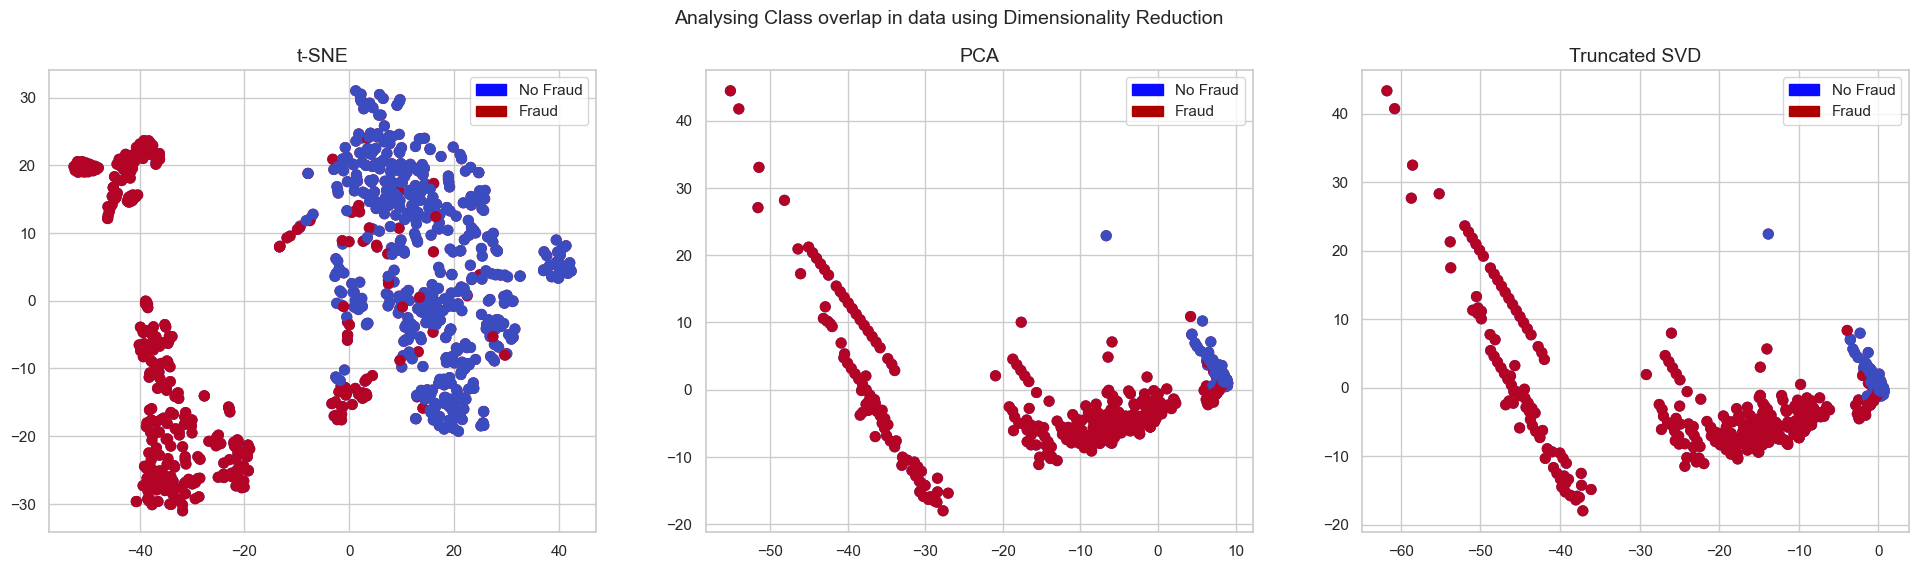

In [39]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Analysing Class overlap in data using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

In [40]:
#Assiging varibles X and Y
X = df.drop(columns=['Class'])
y = df['Class']

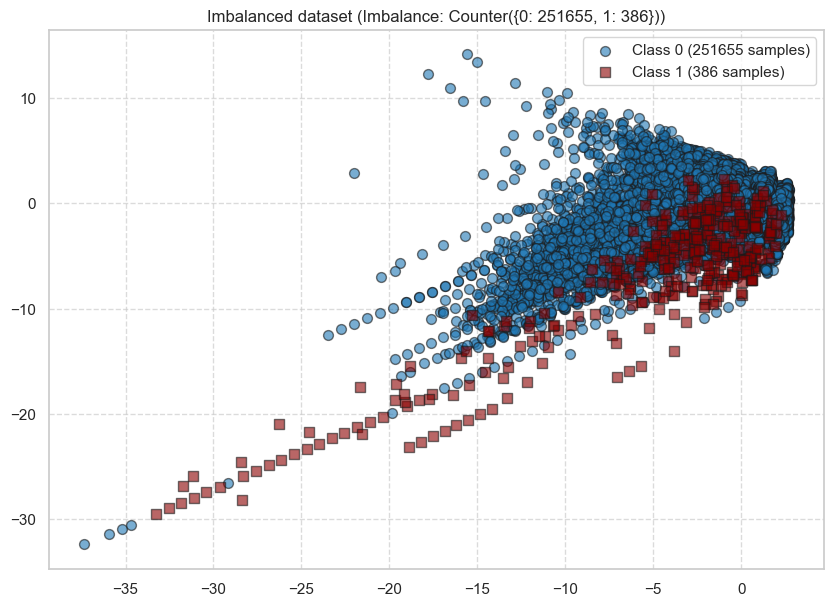

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from collections import Counter

def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#8B0000']  # Blue & Red
    markers = ['o', 's']
    
    plt.figure(figsize=(10, 7))  # Increase figure size

    # Count class distribution
    class_counts = Counter(y)
    
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y == l, 0], X[y == l, 1], 
            c=c, label=f"Class {l} ({class_counts[l]} samples)", 
            marker=m, edgecolors='k', alpha=0.6, s=50
        )

    plt.title(f"{label} (Imbalance: {class_counts})")
    plt.legend(loc='upper right')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the 2D space with improved visualization
plot_2d_space(X_pca, y, 'Imbalanced dataset')


In [42]:
#Splitting data into trainset and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=48, stratify=y)

In [43]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import friedmanchisquare
from scikit_posthocs import posthoc_nemenyi_friedman
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score, 
    roc_auc_score, confusion_matrix
)
from collections import Counter


# Define classifiers
classifiers = [
    RandomForestClassifier(random_state=42, n_jobs=-1),
    BalancedRandomForestClassifier(random_state=42, n_jobs=-1),
    AdaBoostClassifier(random_state=42),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1),
    EasyEnsembleClassifier(random_state=42)
]

# Define resampling techniques
resampling_techniques = {
    'None': None,
    'Random Oversampling': RandomOverSampler(random_state=42),
    'Random Undersampling': RandomUnderSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'Borderline-SMOTE': BorderlineSMOTE(random_state=42, kind='borderline-1'),
    'ADASYN': ADASYN(random_state=42),
    'SMOTETomek': SMOTETomek(random_state=42),
    'SMOTEENN': SMOTEENN(random_state=42),
}

# Initialize performance matrix and confusion matrix list
matrix = pd.DataFrame()
confusion_matrices = []

# Dictionary to store results for each classifier and sampling technique
results_dict = {}

# Loop through classifiers and evaluate each with each resampling technique
for classifier in classifiers:
    classifier_name = type(classifier).__name__

    for sampling_name, sampler in resampling_techniques.items():
        print(f"\nTraining {classifier_name} with {sampling_name}...")  # Display training progress
        
        start_time = time.time()

        # Apply resampling if sampler is not None
        if sampler is not None:
            resample_start_time = time.time()
            X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
            resample_time = time.time() - resample_start_time
        else:
            X_resampled, y_resampled = X_train, y_train
            resample_time = 0.0

        train_start_time = time.time()
        classifier.fit(X_resampled, y_resampled)
        train_time = time.time() - train_start_time
        total_time = time.time() - start_time

        y_pred = classifier.predict(X_test)
        y_pred_prob = classifier.predict_proba(X_test)[:, 1] if hasattr(classifier, "predict_proba") else np.zeros_like(y_pred)

        # Metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        cohen_kappa = cohen_kappa_score(y_test, y_pred)
        mcc = matthews_corrcoef(y_test, y_pred)
        balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
        geometric_mean = np.sqrt(precision * recall) if precision * recall > 0 else 0
        auc = roc_auc_score(y_test, y_pred_prob)
        youden_index = recall + precision - 1
        error_rate = 1 - accuracy 

        # Confusion matrix and derived metrics
        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

        # Store confusion matrix for later plotting
        confusion_matrices.append((cm, classifier_name, sampling_name))

        # Append results to the performance matrix
        new_row = {
            'Classifier': classifier_name,
            'Sampling': sampling_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'Cohen Kappa': cohen_kappa,
            'MCC': mcc,
            'Balanced Accuracy': balanced_accuracy,
            'Geometric Mean': geometric_mean,
            'AUC': auc,
            'Youden Index': youden_index,
            'Misclassification Error': error_rate,
            'Resample Time (s)': resample_time,
            'Train Time (s)': train_time,
            'Total Time (s)': total_time,
            'TP': tp,
            'TN': tn,
            'FP': fp,
            'FN': fn,
            'Specificity': specificity
        }
        matrix = pd.concat([matrix, pd.DataFrame([new_row])], ignore_index=True)

            # Save classification report for this classifier
        report = classification_report(y_test, y_pred, output_dict=True)
        results_dict[(type(classifier).__name__, sampling_name)] = {
            'y_true': y_test,
            'y_pred': y_pred,
            'f1_0': report['0']['f1-score'],
            'f1_1': report['1']['f1-score'],
            'AUC': auc,
        }

# Display performance matrix
matrix


Training RandomForestClassifier with None...

Training RandomForestClassifier with Random Oversampling...

Training RandomForestClassifier with Random Undersampling...

Training RandomForestClassifier with SMOTE...

Training RandomForestClassifier with Borderline-SMOTE...

Training RandomForestClassifier with ADASYN...

Training RandomForestClassifier with SMOTETomek...

Training RandomForestClassifier with SMOTEENN...

Training BalancedRandomForestClassifier with None...

Training BalancedRandomForestClassifier with Random Oversampling...

Training BalancedRandomForestClassifier with Random Undersampling...

Training BalancedRandomForestClassifier with SMOTE...

Training BalancedRandomForestClassifier with Borderline-SMOTE...

Training BalancedRandomForestClassifier with ADASYN...

Training BalancedRandomForestClassifier with SMOTETomek...

Training BalancedRandomForestClassifier with SMOTEENN...

Training AdaBoostClassifier with None...

Training AdaBoostClassifier with Random Overs

,Classifier,Sampling,Accuracy,Precision,Recall,F1-Score,Cohen Kappa,MCC,Balanced Accuracy,Geometric Mean,...,Youden Index,Misclassification Error,Resample Time (s),Train Time (s),Total Time (s),TP,TN,FP,FN,Specificity
0,RandomForestClassifier,None,1.000,0.938,0.776,0.849,0.849,0.853,0.888,0.853,...,0.713,0.000,0.000,53.020,53.020,90,75491,6,26,1.000
1,RandomForestClassifier,Random Oversampling,1.000,0.938,0.776,0.849,0.849,0.853,0.888,0.853,...,0.713,0.000,0.233,59.619,59.853,90,75491,6,26,1.000
2,RandomForestClassifier,Random Undersampling,0.975,0.054,0.931,0.102,0.099,0.221,0.953,0.224,...,-0.015,0.025,0.077,0.352,0.429,108,73604,1893,8,0.975
3,RandomForestClassifier,SMOTE,1.000,0.882,0.836,0.858,0.858,0.858,0.918,0.859,...,0.718,0.000,0.563,101.625,102.189,97,75484,13,19,1.000
4,RandomForestClassifier,Borderline-SMOTE,1.000,0.876,0.793,0.833,0.832,0.833,0.896,0.834,...,0.669,0.000,0.666,121.692,122.359,92,75484,13,24,1.000
5,RandomForestClassifier,ADASYN,1.000,0.873,0.828,0.850,0.849,0.850,0.914,0.850,...,0.700,0.000,0.660,101.962,102.623,96,75483,14,20,1.000
6,RandomForestClassifier,SMOTETomek,1.000,0.882,0.836,0.858,0.858,0.858,0.918,0.859,...,0.718,0.000,323.919,104.265,428.185,97,75484,13,19,1.000
7,RandomForestClassifier,SMOTEENN,0.999,0.810,0.845,0.827,0.827,0.827,0.922,0.827,...,0.655,0.001,319.320,88.619,407.939,98,75474,23,18,1.000
8,BalancedRandomForestClassifier,None,0.977,0.058,0.914,0.110,0.107,0.228,0.946,0.231,...,-0.028,0.023,0.000,4.319,4.328,106,73784,1713,10,0.977
9,BalancedRandomForestClassifier,Random Oversampling,1.000,0.929,0.784,0.850,0.850,0.853,0.892,0.853,...,0.713,0.000,0.242,61.473,61.715,91,75490,7,25,1.000


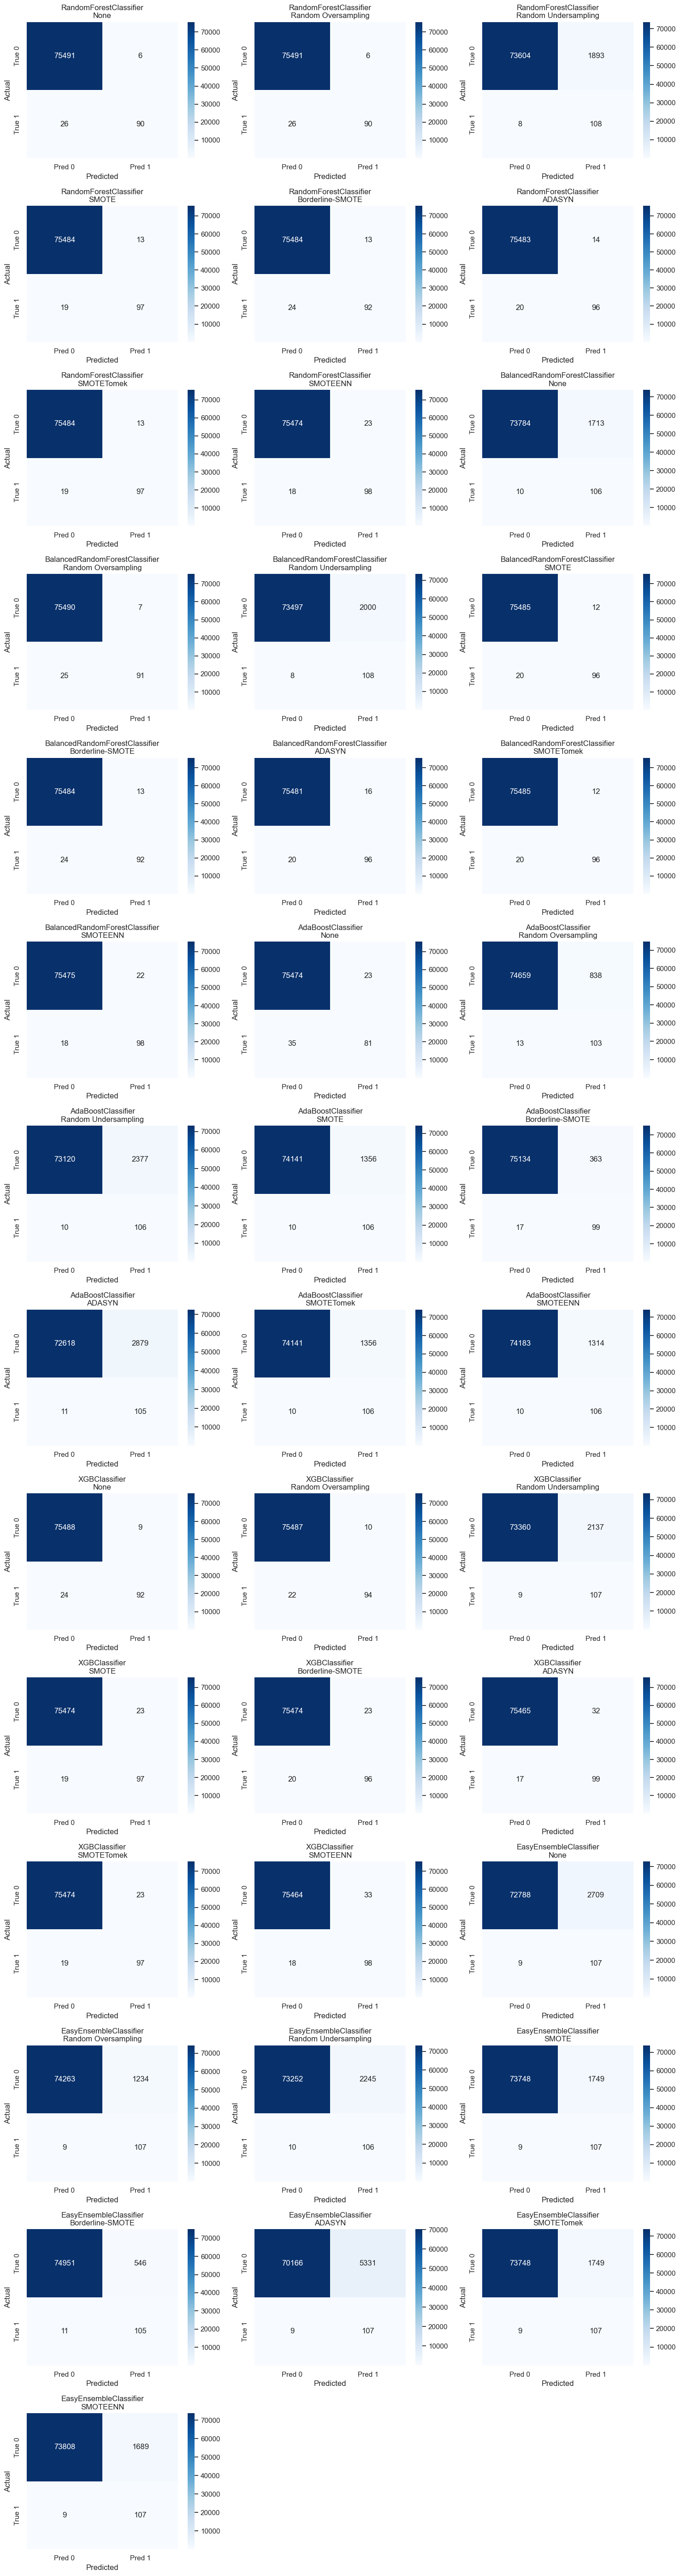

In [44]:
# -------------------------------
# Plot all confusion matrices as subplots
# -------------------------------
n_matrices = len(confusion_matrices)
cols = 3
rows = -(-n_matrices // cols)  # Ceiling division

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()

for i, (cm, clf_name, samp_name) in enumerate(confusion_matrices):
    ax = axes[i]
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Pred 0", "Pred 1"],
                yticklabels=["True 0", "True 1"],
                ax=ax)
    ax.set_title(f"{clf_name}\n{samp_name}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

# Remove any extra axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [45]:
#Setting the float to 4 decimal places

matrix.to_excel('results.xlsx', index=False)
matrix

,Classifier,Sampling,Accuracy,Precision,Recall,F1-Score,Cohen Kappa,MCC,Balanced Accuracy,Geometric Mean,...,Youden Index,Misclassification Error,Resample Time (s),Train Time (s),Total Time (s),TP,TN,FP,FN,Specificity
0,RandomForestClassifier,None,1.000,0.938,0.776,0.849,0.849,0.853,0.888,0.853,...,0.713,0.000,0.000,53.020,53.020,90,75491,6,26,1.000
1,RandomForestClassifier,Random Oversampling,1.000,0.938,0.776,0.849,0.849,0.853,0.888,0.853,...,0.713,0.000,0.233,59.619,59.853,90,75491,6,26,1.000
2,RandomForestClassifier,Random Undersampling,0.975,0.054,0.931,0.102,0.099,0.221,0.953,0.224,...,-0.015,0.025,0.077,0.352,0.429,108,73604,1893,8,0.975
3,RandomForestClassifier,SMOTE,1.000,0.882,0.836,0.858,0.858,0.858,0.918,0.859,...,0.718,0.000,0.563,101.625,102.189,97,75484,13,19,1.000
4,RandomForestClassifier,Borderline-SMOTE,1.000,0.876,0.793,0.833,0.832,0.833,0.896,0.834,...,0.669,0.000,0.666,121.692,122.359,92,75484,13,24,1.000
5,RandomForestClassifier,ADASYN,1.000,0.873,0.828,0.850,0.849,0.850,0.914,0.850,...,0.700,0.000,0.660,101.962,102.623,96,75483,14,20,1.000
6,RandomForestClassifier,SMOTETomek,1.000,0.882,0.836,0.858,0.858,0.858,0.918,0.859,...,0.718,0.000,323.919,104.265,428.185,97,75484,13,19,1.000
7,RandomForestClassifier,SMOTEENN,0.999,0.810,0.845,0.827,0.827,0.827,0.922,0.827,...,0.655,0.001,319.320,88.619,407.939,98,75474,23,18,1.000
8,BalancedRandomForestClassifier,None,0.977,0.058,0.914,0.110,0.107,0.228,0.946,0.231,...,-0.028,0.023,0.000,4.319,4.328,106,73784,1713,10,0.977
9,BalancedRandomForestClassifier,Random Oversampling,1.000,0.929,0.784,0.850,0.850,0.853,0.892,0.853,...,0.713,0.000,0.242,61.473,61.715,91,75490,7,25,1.000


## Optimising the algorithms with Hyperparameter Tuning 

In [ ]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, fbeta_score,
    cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score,
    roc_auc_score, confusion_matrix
)

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from imblearn.ensemble import EasyEnsembleClassifier, BalancedRandomForestClassifier
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek, SMOTEENN

# ========== Classifiers with extended hyperparameters ==========
classifier_params = {
    'RandomForestClassifier': {
        'model': RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced'),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    'BalancedRandomForestClassifier': {
        'model': BalancedRandomForestClassifier(random_state=42, n_jobs=-1),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [10, 20, None],
            'sampling_strategy': ['auto', 0.8]
        }
    },
    'AdaBoostClassifier': {
        'model': AdaBoostClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.05, 0.1, 1.0]
        }
    },
    'XGBClassifier': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 6, 9],
            'learning_rate': [0.01, 0.1, 0.2],
            'scale_pos_weight': [1, 5, 10]
        }
    },
    'EasyEnsembleClassifier': {
        'model': EasyEnsembleClassifier(random_state=42),
        'params': {
            'n_estimators': [10, 20, 50]
        }
    }
}

# ========== Resampling techniques with fine-tuned parameters ==========
resampling_techniques = {
    'None': None,
    'Random Oversampling': RandomOverSampler(random_state=42, sampling_strategy=0.8),
    'Random Undersampling': RandomUnderSampler(random_state=42, sampling_strategy=0.8),
    'SMOTE': SMOTE(random_state=42, k_neighbors=3, sampling_strategy=0.8),
    'Borderline-SMOTE': BorderlineSMOTE(random_state=42, k_neighbors=3, sampling_strategy=0.8),
    'ADASYN': ADASYN(random_state=42, n_neighbors=3, sampling_strategy=0.8),
    'SMOTETomek': SMOTETomek(random_state=42, sampling_strategy=0.8),
    'SMOTEENN': SMOTEENN(random_state=42, sampling_strategy=0.8)
}

# ========== Cross-validation setup ==========
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ========== Performance collection ==========
performance_matrix = pd.DataFrame()

# ========== Main evaluation loop ==========
for clf_name, clf_info in classifier_params.items():
    for sampling_name, sampler in resampling_techniques.items():
        print(f"\n🔍 Optimizing {clf_name} with {sampling_name}...")

        # Resampling
        start_sampling = time.time()
        if sampler:
            X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
        else:
            X_resampled, y_resampled = X_train, y_train
        end_sampling = time.time()
        sampling_time = end_sampling - start_sampling

        # Model selection via GridSearchCV
        best_model = GridSearchCV(clf_info['model'], clf_info['params'], cv=cv, scoring='f1', n_jobs=-1)

        start_train = time.time()
        best_model.fit(X_resampled, y_resampled)
        end_train = time.time()
        training_time = end_train - start_train

        best_clf = best_model.best_estimator_

        # Predict
        y_pred = best_clf.predict(X_test)
        y_pred_prob = best_clf.predict_proba(X_test)[:, 1] if hasattr(best_clf, "predict_proba") else np.zeros_like(y_pred)

        # Confusion Matrix and Additional Metrics
        specificity = tn / (tn + fp)
        youden_index = recall_score(y_test, y_pred) + specificity - 1
        misclassification_error = 1 - accuracy_score(y_test, y_pred)
        g_mean = np.sqrt(recall_score(y_test, y_pred) * specificity)
        mcc = matthews_corrcoef(y_test, y_pred)
        #f2 = fbeta_score(y_test, y_pred, beta=2, zero_division=0)

        # Store all metrics
        metrics = {
            'Classifier': clf_name,
            'Sampling': sampling_name,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred, zero_division=0),
            'Recall': recall_score(y_test, y_pred, zero_division=0),
            'F1-Score': f1_score(y_test, y_pred, zero_division=0),
            'Balanced Accuracy': balanced_accuracy_score(y_test, y_pred),
            'MCC': mcc,
            'Specificity': specificity,
            'AUC': roc_auc_score(y_test, y_pred_prob),
            'Cohen Kappa': cohen_kappa_score(y_test, y_pred),
            'G-Mean': g_mean,
            'Youden Index': youden_index,
            'Misclassification Error': misclassification_error,
            'Training Time (s)': training_time,
            'Sampling Time (s)': sampling_time
        }

        
       

        # Append to performance matrix
        performance_matrix = pd.concat([performance_matrix, pd.DataFrame([metrics])], ignore_index=True)

         # Save classification report and ROC data for this classifier
        report = classification_report(y_test, y_pred, output_dict=True)
        results_dict[(clf_name, sampling_name)] = {
            'f1_0': report['0']['f1-score'],
            'f1_1': report['1']['f1-score']
        }



🔍 Optimizing RandomForestClassifier with None...


In [47]:
#Setting the float to 4 decimal places

performance_matrix.to_excel('Results Optimised for CCFD.xlsx', index=False)
performance_matrix

""


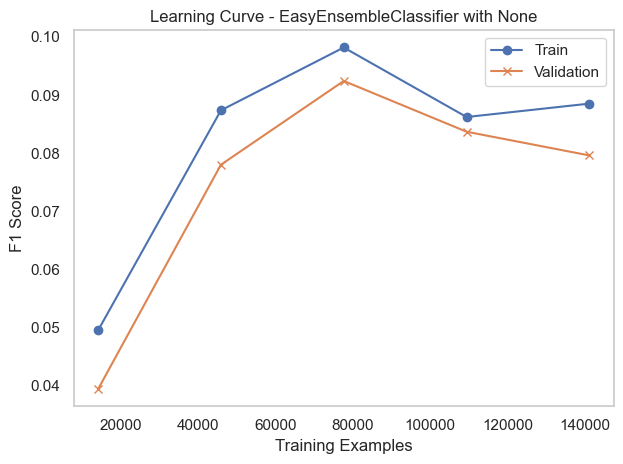

In [48]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    classifier, X_resampled, y_resampled, cv=5, scoring='f1', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5), random_state=42
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, label="Train", marker='o')
plt.plot(train_sizes, test_scores_mean, label="Validation", marker='x')
plt.title(f"Learning Curve - {classifier_name} with {sampling_name}")
plt.xlabel("Training Examples")
plt.ylabel("F1 Score")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


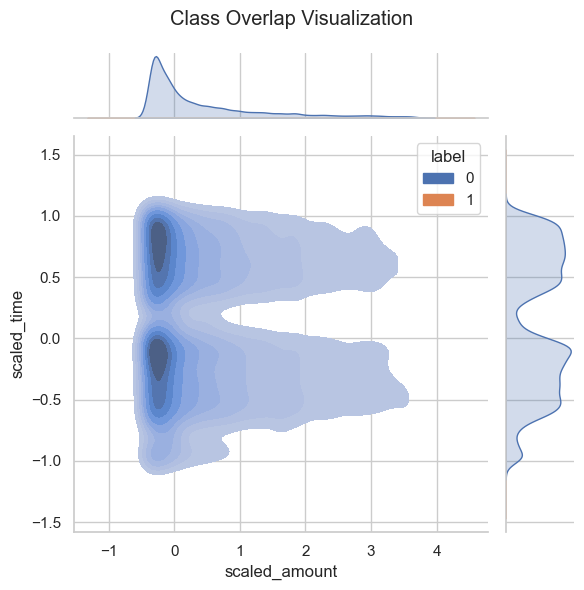

In [51]:
import seaborn as sns

# Choose two top important features if available
selected_features = X_train.columns[:2]

sns.jointplot(
    data=pd.concat([X_train[selected_features], y_train.rename("label")], axis=1),
    x=selected_features[0], y=selected_features[1], hue="label", kind="kde", fill=True
)
plt.suptitle("Class Overlap Visualization")
plt.tight_layout()
plt.show()


In [53]:
# PART 2: LEARNING CURVES, ROC CURVES, AND LOG LOSS

def plot_learning_curves(classifier, X_train, y_train, title, cv=5):
    """Plot learning curves for a classifier"""
    train_sizes, train_scores, test_scores = learning_curve(
        classifier, X_train, y_train, cv=cv, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10), scoring='f1'
    )
    
    # Calculate mean and standard deviation
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.grid()
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("F1 Score")
    plt.legend(loc="best")
    plt.savefig(f'learning_curve_{title.replace(" ", "_")}.png', dpi=300, bbox_inches='tight')
    plt.show()

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

def visualize_class_overlap(X_train, y_train):
    """Visualize class overlap using different techniques"""
    plt.figure(figsize=(18, 12))
    
    # 1. PCA for dimensionality reduction
    plt.subplot(2, 2, 1)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_train)
    
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, alpha=0.6, cmap='viridis')
    plt.colorbar(scatter)
    plt.title('Class Overlap - PCA')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    
    # 2. t-SNE for better cluster visualization
    plt.subplot(2, 2, 2)
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X_train)
    
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, alpha=0.6, cmap='viridis')
    plt.colorbar(scatter)
    plt.title('Class Overlap - t-SNE')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    
    # 3. Feature distributions by class (select first two features)
    plt.subplot(2, 2, 3)
    sns.kdeplot(x=X_train[:, 0], hue=y_train, palette="viridis", common_norm=False, fill=True, alpha=0.5)
    plt.title('Feature 1 Distribution by Class')
    plt.xlabel('Feature 1')
    plt.ylabel('Density')
    
    plt.subplot(2, 2, 4)
    sns.kdeplot(x=X_train[:, 1], hue=y_train, palette="viridis", common_norm=False, fill=True, alpha=0.5)
    plt.title('Feature 2 Distribution by Class')
    plt.xlabel('Feature 2')
    plt.ylabel('Density')
    
    plt.tight_layout()
    plt.savefig('class_overlap.png', dpi=300, bbox_inches='tight')
    plt.show()

# Example usage (uncomment when needed):
visualize_class_overlap(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curves(results_dict):
    """Plot ROC curves for all classifiers and sampling techniques"""
    # Group by classifiers
    classifiers = set([clf_name for (clf_name, _) in results_dict.keys()])
    
    for classifier in classifiers:
        plt.figure(figsize=(12, 8))
        
        for (clf_name, sampling_name), result in results_dict.items():
            if clf_name == classifier:
                y_true = result['y_true']
                y_pred_prob = result.get('y_pred_prob', None)
                
                if y_pred_prob is not None:
                    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
                    roc_auc = auc(fpr, tpr)
                    plt.plot(fpr, tpr, lw=2, label=f'{sampling_name} (AUC = {roc_auc:.3f})')
        
        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curves for {classifier}')
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.savefig(f'roc_curves_{classifier}.png', dpi=300, bbox_inches='tight')
        plt.close()

# Example usage (uncomment when needed):
plot_roc_curves(results_dict)  # Where results_dict contains classifier results